In [13]:
import json
import re
import matplotlib.dates as mdates
#https://github.com/JMendes1995/py_heideltime
from py_heideltime import py_heideltime
from dateutil import parser

with open('2-3-testset.json') as json_file:
    data = json.load(json_file)


In [14]:
#print(data['histories']['009fd1d9-dc31-4086-8132-18c568b0db61']['content'])

# Load the data so we can find all the doc titles
import pickle

#Load the knowledge base
path = "C:/Users/tmsch/Desktop/ADS_Thesis/Thomas/"
with open(path + "meetingsInformation.txt", "rb") as fp:   
    meetingsInformation = pickle.load(fp)
with open(path + "itemsInformation.txt", "rb") as fp:   
    itemsInformation = pickle.load(fp)
with open(path + "entriesInformation.txt", "rb") as fp:   
    entriesInformation = pickle.load(fp)

with open(path + "documentsInformation.txt", "rb") as fp:   
    documentsInformation = pickle.load(fp)    
with open(path + "listdocumentsInformation.txt", "rb") as fp:   
    listdocumentsInformation = pickle.load(fp)
with open(path + "meetdocumentsInformation.txt", "rb") as fp:   
    meetdocumentsInformation = pickle.load(fp)
    
    
displaynames = []
displayids = []
displaytypes = []

def norm(s):
    return s.replace('"', "").replace("'", "").replace("“", "").replace("`", "").replace("\n","").replace('.pdf',"").replace('.docx', '').replace('.doc', '').strip().lower()

for d in documentsInformation:
    #print(documentsInformation[d])
    displaynames.append(norm(documentsInformation[d]['displayname']))
    displayids.append(d)
    displaytypes.append('documentsInformation')
    
for d in listdocumentsInformation:
    displaynames.append(norm(listdocumentsInformation[d]['displayname']))
    displayids.append(d)
    displaytypes.append('listdocumentsInformation')
    
for d in meetdocumentsInformation:
    displaynames.append(norm(meetdocumentsInformation[d]['displayname']))
    displayids.append(d)
    displaytypes.append('meetdocumentsInformation')
    

In [15]:
# Now extract text

#example from stackoverflow
#https://stackoverflow.com/questions/26494211/extracting-text-from-a-pdf-file-using-pdfminer-in-python

import io

from copy import deepcopy
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage


extractedtitles = [] # list of all titles
fulldates = [] #  list of all dates

docdates = {} # dict of docid-> dates

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = io.StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()

    ibabs_urls = []
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages,
                                  password=password,
                                  caching=caching,
                                  check_extractable=True):
        interpreter.process_page(page)


    fp.close()
    device.close()
    text = retstr.getvalue()
    retstr.close()
    
    reg1 = "'[^']+'"
    reg2 = '"[^"]+"'
    reg3 = '“[^“]+"'
    reg4 = "`[^`]+'"
    reg5 = '‘[^’]+’'

    matches = []
    matches.extend(re.findall(reg1, text))
    matches.extend(re.findall(reg2, text))
    matches.extend(re.findall(reg3, text))
    matches.extend(re.findall(reg4, text))
    matches.extend(re.findall(reg5, text))
    
    results = py_heideltime(text, language='Dutch')
    fulldates.extend([results[0]])
    
    docdates[path] = deepcopy(results)#py_heideltime(text, language='Dutch')
    
    matches = [m.replace('"', "").replace("'", "").replace("“", "").replace("`", "").replace("\n","").replace("’","").replace("‘","").strip().lower() for m in matches if len(m) < 100]
    extractedtitles.extend(matches)
    print(matches)
#    print(re.findall("/"([^"\\]*(\\.[^"\\]*)*)"|\'([^\'\\]*(\\.[^\'\\]*)*)\'/", text)
#“
    
    return text

print('brieven')
for brief in data['brieven']:
    data['brieven'][brief]['content'] = convert_pdf_to_txt('./brieven/' + str(brief) + '.pdf')
    print(brief)
    
if '' in data['memos']:
    data['memos'].pop('')
        
print()
print('memos')
for memo in data['memos']:
    data['memos'][memo]['content'] = convert_pdf_to_txt('./memos/' + str(memo) + '.pdf')
    print(memo)
        
print()
print('historie')
for h in data['histories']:
    if h != '':
        data['histories'][h]['content'] = convert_pdf_to_txt('./besluitdocs/' + str(h) + '.pdf')
        print(h)

brieven
['tegengaan onveilig, niet leefbaar en malafide ondernemersklimaat', 'passende ondersteuning en begeleiding bij een vergunningsaanvraag', 'extra regels vragen zorgvuldige uitvoering', 'passende ondersteuning en begeleiding bij een vergunningsaanvraag', 'projectplan', 'ondersteuning van ondernemers bij bijvoorbeeld invullen aanvraagformulieren', 'extra regels vragen zorgvuldige uitvoering']
6ffbfcd6-47c6-45d4-9572-52582985712d
['wonen', 'wonen', 'heycop', 'de waarde']
1328dfaf-5593-42b3-9a9b-5a0f5d156c3e
['utrecht kiest voor gezonde lucht']
551ce314-c09f-480e-a06e-94e17df558ae
[]
07476354-b558-4b4b-93c2-17ff67dc859e
['online', 'offline', 'online', 'op straat', 'jonge aanwas', 'kracht van de wijk']
8a603db9-757f-4f7f-b083-86f72470a226
['bouwen']
3ef920e4-b4f8-4f99-a31f-59ea51079a3c
['poort naar de binnenstad', 'poorten', 'afdwingen', 'poort naar de binnenstad', 'zebra-safe', 'verkeersveiligheid rondom basisschool de pijlstaart']
0b6db332-f1fc-4ca7-a85e-3420c17c1e81
[]
c052528d-1c

In [16]:
#versie 1 : kijk of displaynames in documenten voorkomen
# resultaat: bijna niets nuttigs - bijna lalleen undescriptive titles die voorkomen in documenten (e.g. voorstel)

for d in displaynames:
    for brief in data['brieven']:
        if norm(d) in data['brieven'][brief]['content']:
            print(d)
      
print()
for d in displaynames:
    for brief in data['memos']:
        if norm(d) in data['memos'][brief]['content']:
            print(d)
            
print()
for d in displaynames:
    for brief in data['histories']:
        if norm(d) in data['histories'][brief]['content']:
            print(d)

voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
het bestemmingsplan
het bestemmingsplan
het bestemmingsplan
het bestemmingsplan
programma
programma
programma
zienswijze
communicatieplan
lis
lis
lis
lis
lis
lis
lis
lis
lis
lis

voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
programma
aanpak jeugdgroepen

voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
het bestemmingsplan
het bestemmingsplan
programma
programma
programma
motie 92
voorbeelden
agenda
agenda
agenda
agenda
agenda
agenda
agenda
ag

In [17]:
#aanpak 2: kijk naar gequotte titels in de documenten (e.g. `Aantrekkelijke Afvalabkken') en kijk daarna of dit voor komt in documenten
# resultaat: erg positief

uniques = 0

#lets see if our quoted titles are found in the list
for et in extractedtitles:
    count = 0
    for i, d in enumerate(displaynames):
        if et in d:
            count += 1
            savename = d
    if count == 1:
            uniques += 1
            print(et)
            print(savename)
            print(displaytypes[i])
            print()


print('extracted titles')
print('true')
print()
print('found')
print(len(extractedtitles))
print('found 1 match')
print(uniques)
            
#HET WERKT ALS JE ALLEEN MATCHT ALS ER MAAR 1 MATCH BESTAAT
    #alsnog een document dat niet de intended one is

passende ondersteuning en begeleiding bij een vergunningsaanvraag
m60 passende ondersteuning en begeleiding bij een vergunningsaanvraag
meetdocumentsInformation

extra regels vragen zorgvuldige uitvoering
m61 extra regels vragen zorgvuldige uitvoering
meetdocumentsInformation

passende ondersteuning en begeleiding bij een vergunningsaanvraag
m60 passende ondersteuning en begeleiding bij een vergunningsaanvraag
meetdocumentsInformation

extra regels vragen zorgvuldige uitvoering
m61 extra regels vragen zorgvuldige uitvoering
meetdocumentsInformation

integraal veiligheidsplan utrecht 2019-2022
info en bijdragen meepraters vaststelling integraal veiligheidsplan utrecht 2019-2022 web
meetdocumentsInformation

extracted titles
true

found
33
found 1 match
5


In [18]:
for d in displaynames:
    if 'zorgvuldige uitvoering' in d:
        print(d)

m61 extra regels vragen zorgvuldige uitvoering


In [19]:
s = 0

titles = 0
times = 0

for h in data['histories']:
    s += data['histories'][h]['urls']
    titles += data['histories'][h]['titles']
    times += len(data['histories'][h]['date_list'])
    times += len(data['histories'][h]['date_meeting'])
    
for b in data['brieven']:
    s += data['brieven'][b]['urls']
    titles += data['brieven'][b]['titles']
    times += len(data['brieven'][b]['date_list'])
    times += len(data['brieven'][b]['date_meeting'])

for m in data['memos']:
    s += data['memos'][m]['urls']
    titles += data['memos'][m]['titles']
    times += len(data['memos'][m]['date_list'])
    times += len(data['memos'][m]['date_meeting'])
    
print('URLs total')
print(s)
print(s / 30)

s = 0
for h in data['histories']:
    s += len(set(data['histories'][h]['url']))
for b in data['brieven']:
    s += len(set(data['brieven'][b]['url']))
for m in data['memos']:
    s += len(set(data['memos'][m]['url']))

print('URLs found')
print(s)
print(s / 30)

print('titles found')
print(titles)

print('useful dates')
print(times)

print('found dates')
ds = []
for doc in fulldates:
    ds.extend(set(doc))
print(len(fulldates))

URLs total
57
1.9
URLs found
56
1.8666666666666667
titles found
14
useful dates
69
found dates
29


    * kan je disambigueren door te kijken of er een URL of datum in dezelfde zin staat?
        * nee!  conclusie: het is een mogelijk interessante richting, maar we kunnen de precisie nog neit waarborgen
        * mogelijke oplossing: als 'recommended' suggereren ipv 

In [23]:

text = 'dit een test 17 januari 2013'
results = py_heideltime(text, language='Dutch')

print(results[0])
#"news" (news-style documents); "narrative" (narrative-style documents (e.g., Wikipedia articles)); "colloquial" (English colloquial (e.g., Tweets and SMS)); "scientific" 

[('2013-01-17', '17 januari 2013')]


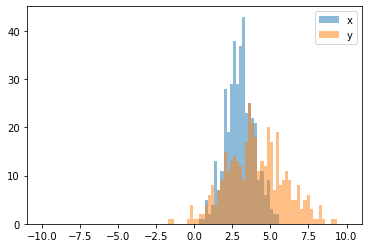

In [24]:
import random
import numpy
from matplotlib import pyplot

x = [random.gauss(3,1) for _ in range(400)]
y = [random.gauss(4,2) for _ in range(400)]

bins = numpy.linspace(-10, 10, 100)

pyplot.hist(x, bins, alpha=0.5, label='x')
pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

In [20]:
briefdates = []
briefuploads = []

historiedates = []
historieuploads = []

memodates = []
memouploads = []

def getDate(dates, d, curdate):
    newdates = []
    for d in dates[d][0]:
        date = d[0]
        if 'PRESENT_REF' in date:
            date = str(curdate)
        if not 'H' in date and not 'P' in date and not 'FUTURE_REF' in date and not 'X' in date:
            if len(date) == 4:
                date += '-01-01'
            date = date.replace('us','').replace('0016', '2016').replace('Q1', '02-01').replace('Q2', '05-01').replace('Q3', '08-01').replace('Q4', '11-01').replace('SU', '08-01')
            if date > '2000-01-01':
                newdates.append(parser.parse(date))
    return newdates


for d in docdates:
    did = d.split('/')[-1].split('.pdf')[0]
    
    print(d)
    print(len(docdates[d][0]))
    
    if 'brieven' in d:
        print(docdates[d][0])
        
        curdate = parser.parse(entriesInformation[did]['Ontvangstdatum'])
        briefdates.append(getDate(docdates, d, curdate))

        print(entriesInformation[did]['Ontvangstdatum'])
        briefuploads.append(parser.parse(entriesInformation[did]['Ontvangstdatum']))
        
    if 'memo' in d:
        print(docdates[d][0])
        print(entriesInformation[did]['Datum invoer'])
        memouploads.append(parser.parse(entriesInformation[did]['Datum invoer']))

        curdate = parser.parse(entriesInformation[did]['Datum invoer'])
        memodates.append(getDate(docdates, d, curdate))

#        memodates.append([parser.parse(x[0]) for x in docdates[d][0]])
        
    if 'besluitdocs' in d:
        print(meetingsInformation[itemsInformation[documentsInformation[did]['origin id']]['origin id']]['meetingdate'])
        historieuploads.append(parser.parse(meetingsInformation[itemsInformation[documentsInformation[did]['origin id']]['origin id']]['meetingdate']))

        curdate = meetingsInformation[itemsInformation[documentsInformation[did]['origin id']]['origin id']]['meetingdate']
        historiedates.append(getDate(docdates, d, curdate))
    
    print()

./brieven/6ffbfcd6-47c6-45d4-9572-52582985712d.pdf
9
[('1034', '1034'), ('2020-12-09', '9 december 2020'), ('2020-02-20', '20 februari 2020'), ('2010', '2010'), ('2020-02-20T02:47', '2:47'), ('2020-12-09', '9 december 2020'), ('P5Y', 'vijf jaar'), ('2020', '2020'), ('P1Y', 'jaren')]
Dec  9 2020 12:00AM

./brieven/1328dfaf-5593-42b3-9a9b-5a0f5d156c3e.pdf
6
[('2020-12-10', '10 december 2020'), ('2001', '2001'), ('2013', '2013'), ('2017', '2017'), ('PAST_REF', 'eerder'), ('PRESENT_REF', 'momenteel')]
Dec 10 2020 12:00AM

./brieven/551ce314-c09f-480e-a06e-94e17df558ae.pdf
12
[('2020-12-10', '10 december 2020'), ('XXXX', 'jaarlijks'), ('2020-03-31', '31 maart 2020'), ('PRESENT_REF', 'huidige'), ('PRESENT_REF', 'huidige'), ('2020', '2020'), ('P2Y', 'maximaal twee jaar'), ('2018', '2018'), ('P2Y', 'twee jaar'), ('2020', '2020'), ('2021-01-01', '1 januari 2021'), ('PAST_REF', 'een jaar later')]
Dec 10 2020 12:00AM

./brieven/07476354-b558-4b4b-93c2-17ff67dc859e.pdf
5
[('2020-12-11', '11 decemb

range(0, 32)
now plotting


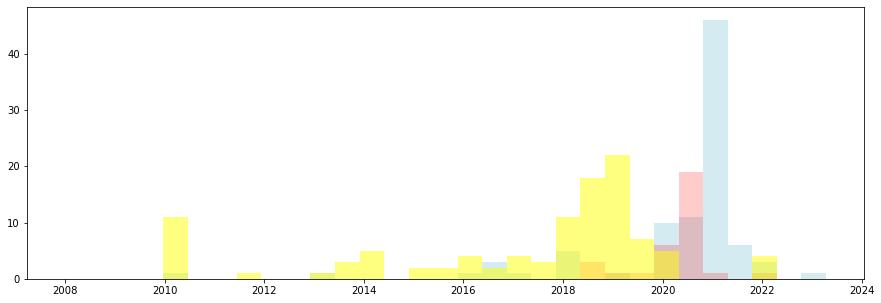

In [21]:
#TEMPORAL COVERAGE

#print(len(briefdates[0]))
#print(len(briefuploads))

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib.dates import date2num

s = 2008
e = 2024

#set universal bin width
start = datetime.date(s,1,1) 
end = datetime.date(e,1,1) 
d = 6*30

bin_width = datetime.timedelta(days=d)

#print((e - s) * 360)
#print((e - s) * 360 / d)

#print(len(range(0, int(e - (s * 360) / (d)))))
print(range(0, int((e - s) * 360 / d)))
#print(len(range(0, int((float(e)-s) / float(d)))))

week = []
for i in range(0, int((e - s) * 360 / d)):
    week.append(start + (i) * bin_width)

numweek = date2num(week)

    
print('now plotting')
#ig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [15, 5]
plt.hist(sum(briefdates, []), bins=numweek, color='lightblue', alpha=0.5)
plt.hist(sum(memodates, []), bins=numweek, color='red', alpha=0.2)
plt.hist(sum(historiedates, []), bins=numweek, color='yellow', alpha=0.5)
plt.show()

[datetime.datetime(2020, 12, 9, 0, 0), datetime.datetime(2020, 12, 10, 0, 0), datetime.datetime(2020, 12, 10, 0, 0), datetime.datetime(2020, 12, 11, 0, 0), datetime.datetime(2020, 12, 11, 0, 0), datetime.datetime(2020, 12, 11, 0, 0), datetime.datetime(2020, 12, 11, 0, 0), datetime.datetime(2020, 12, 17, 0, 0), datetime.datetime(2020, 12, 14, 0, 0), datetime.datetime(2020, 12, 17, 0, 0)]

[0, -293, -3995, -293, 0, -343]

range(-4000, 1000, 100)
now plotting


(array([ 0.,  0.,  3.,  3.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  1.,  0.,  4.,  0.,  3.,  0.,  0.,  0.,  3.,  0.,  0.,  3.,
         1.,  2.,  2.,  4.,  3.,  0.,  2.,  7., 14., 11.,  4.,  8., 12.,
         4.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  2.,  0.]),
 array([-4000, -3900, -3800, -3700, -3600, -3500, -3400, -3300, -3200,
        -3100, -3000, -2900, -2800, -2700, -2600, -2500, -2400, -2300,
        -2200, -2100, -2000, -1900, -1800, -1700, -1600, -1500, -1400,
        -1300, -1200, -1100, -1000,  -900,  -800,  -700,  -600,  -500,
         -400,  -300,  -200,  -100,     0,   100,   200,   300,   400,
          500,   600,   700,   800,   900]),
 <BarContainer object of 49 artists>)

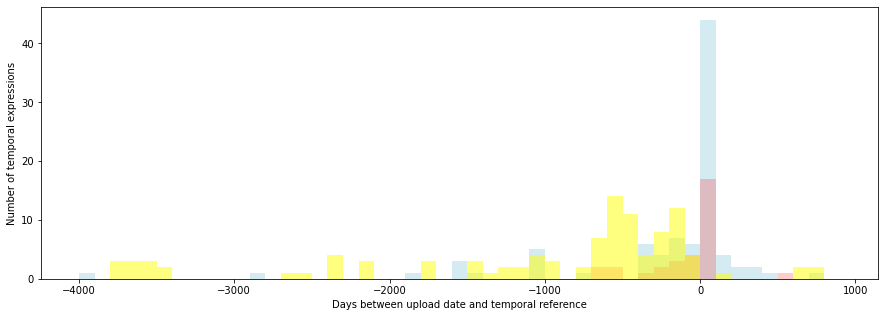

In [31]:
#relative temporal coverage

rbriefdates = []
rmemodates = []
rhistoriedates = []

print(briefuploads)

for i, curdate in enumerate(briefuploads):
    rbriefdates.append([(x - curdate).days for x in briefdates[i]])
for i, curdate in enumerate(memouploads):
    rmemodates.append([(x - curdate).days for x in memodates[i]])
for i, curdate in enumerate(historieuploads):
    rhistoriedates.append([(x - curdate).days for x in historiedates[i]])

print()
print(rbriefdates[0])

start = -4000
end = 1000
step = 100

print()
bs = range(start, end, step)
print(bs)

rbriefdates2 = [x for x in rbriefdates if x != 0]
rmemodates2 = [x for x in rmemodates if x != 0]
rhistoriedates2 = [x for x in rhistoriedates if x != 0]

print('now plotting')
#ig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [15, 5]
plt.ylabel('Number of temporal expressions')
plt.xlabel('Days between upload date and temporal reference')
plt.hist(sum(rbriefdates2, []), bins=bs, color='lightblue', alpha=0.5)
plt.hist(sum(rmemodates2, []), bins=bs, color='red', alpha=0.2)
plt.hist(sum(rhistoriedates2, []), bins=bs, color='yellow', alpha=0.5)


In [24]:
for b in bs:
    print(b)

#!pip3 install python-dateutil

-4000
-3900
-3800
-3700
-3600
-3500
-3400
-3300
-3200
-3100
-3000
-2900
-2800
-2700
-2600
-2500
-2400
-2300
-2200
-2100
-2000
-1900
-1800
-1700
-1600
-1500
-1400
-1300
-1200
-1100
-1000
-900
-800
-700
-600
-500
-400
-300
-200
-100
0
100
200
300
400
500
600
700
800
900


In [197]:
#Next step: plot document re-use instead!

#Store udos3 so we can investigate the dupes more easily (e.g. the temporal nature of document re-use)
with open(path + "uniquedossiers.txt", "rb") as fp:   
    udos = pickle.load(fp)

with open(path + "uniqueses.txt", "rb") as fp:   
    uniqueses = pickle.load(fp)

    
print(len(udos))
print(len(uniqueses))

3004
6320


In [288]:
#dict [id] = [days since id (= 0), days since uniqueses[0], since [1] etc]
datestore = {}

def getDate2(d):
    if d['origin type'] == 'entry':
        if 'Ontvangstdatum' in entriesInformation[d['origin id']]:
            curdate = entriesInformation[d['origin id']]['Ontvangstdatum']
        elif 'Datum' in entriesInformation[d['origin id']]:
            curdate = entriesInformation[d['origin id']]['Datum']
        elif 'Datum invoer' in entriesInformation[d['origin id']]:
            curdate = entriesInformation[d['origin id']]['Datum invoer']
        else:
            print(entriesInformation[d[0]['origin id']])
            anchor
    else: #case item document
        curdate = meetingsInformation[itemsInformation[documentsInformation[d['id']]['origin id']]['origin id']]['meetingdate'] #date of id
    if curdate == None:
        return None
#        print(entriesInformation[d['origin id']])
    return parser.parse(curdate)



for u in uniqueses:
    datestore[u] = [0]
    
    curdate = getDate2(uniqueses[u][0])
    #print(curdate)
    for dupe in uniqueses[u]:
        #print()
#        print(dupe['origin type'])
#        print(getDate2(dupe))
#        print(curdate)
        if getDate2(dupe) != None and curdate != None:
            datestore[u].append((getDate2(dupe) - curdate).days)
            
        #print(datestore[u][-1])
    
    #normalize so most recent date is 0, rest is negative
    m = max(datestore[u])
    datestore[u] = list(([(x - m)  for x in datestore[u]]))  # divide by 365 if you want to plot per year

listofdates = []
for i in datestore:
    print(datestore[i])
    listofdates.extend(datestore[i])
#    print(datestore[u])
#    break

[0, 0, 0, 0, 0, 0, 0, 0]
[-35, -35, -35, -35, -35, 0, -35, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[-28, -28, -28, -28, -28, 0, -28, 0]
[-56, -56, -56, 0, -56, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-112, -112, -112, -112, -112, 0, -112, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-7, -7, 0, -7, 0, -7, 0, -7, 0, -7, 0]
[0, 0, 0, 0, 0

[-18, -18, -51, 0, -175, -18, -51, 0, -18, -51, 0, -175, -18, -51, 0, -18, -51, 0, -175]
[-18, -18, -51, 0, -18, -51, 0, -18, -51, 0, -18, -51, 0, -18, -51, 0]
[-33, -33, -33, -33, -33, -21, -4, 0, -33, -21, -4, 0]
[-29, -29, -17, 0, -29, -17, 0, -29, -17, 0, -29, -17, 0, -29, -17, 0]
[-33, -33, -21, -4, 0, -33, -21, -4, 0, -33, -21, -4, 0, -33, -21, -4, 0, -33, -21, -4, 0]
[-33, -33, -4, 0, -33, -4, 0, -33, -4, 0, -33, -4, 0, -33, -4, 0]
[-33, -33, -4, 0, -33, -4, 0, -33, -4, 0, -33, -4, 0, -33, -4, 0]
[-33, -33, -21, -4, 0, -33, -21, -4, 0, -33, -21, -4, 0, -33, -21, -4, 0, -33, -21, -4, 0]
[-19, -19, -19, -19, -19, 0, -19, 0]
[-19, -19, 0, -19, 0, -19, 0, -19, 0, -19, 0]
[-19, -19, 0, -19, 0, -19, 0, -19, 0, -19, 0]
[-19, -19, 0, -19, 0, -19, 0, -19, 0, -19, 0]
[-19, -19, 0, -19, 0, -19, 0, -19, 0, -19, 0]
[-19, -19, 0, 0, 0, -19, 0, -19, 0]
[-19, -19, 0, 0, 0, -19, 0, -19, 0]
[-19, -19, 0, -19, 0, -19, 0, -19, 0, -19, 0]
[-19, -19, 0, -19, 0, -19, 0, -19, 0, -19, 0]
[-19, -19, 0, -


range(-1000, 0, 20)
now plotting


(array([0.000e+00, 0.000e+00, 0.000e+00, 2.100e+01, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 7.000e+00, 0.000e+00,
        1.200e+01, 3.100e+01, 2.900e+01, 1.400e+01, 2.000e+01, 1.000e+01,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.700e+01,
        6.000e+00, 5.000e+00, 4.900e+01, 4.700e+01, 1.800e+01, 4.700e+01,
        1.360e+02, 1.240e+02, 1.870e+02, 3.900e+01, 3.300e+01, 3.000e+01,
        7.500e+01, 3.800e+01, 1.270e+02, 2.030e+02, 1.190e+02, 1.840e+02,
        3.170e+02, 3.990e+02, 5.730e+02, 9.550e+02, 1.620e+03, 3.399e+03,
        6.516e+03]),
 array([-1000,  -980,  -960,  -940,  -920,  -900,  -880,  -860,  -840,
         -820,  -800,  -780,  -760,  -740,  -720,  -700,  -680,  -660,
         -640,  -620,  -600,  -580,  -560,  -540,  -520,  -500,  -480,
         -460,  -440,  -420,  -400,  -380,  -360,  -340,  -320,  -300,
         -280,  -260,  -240,  -220,  -200,  -180,  -160,  -140,  -120,
         -100,   -80,   -60,   -

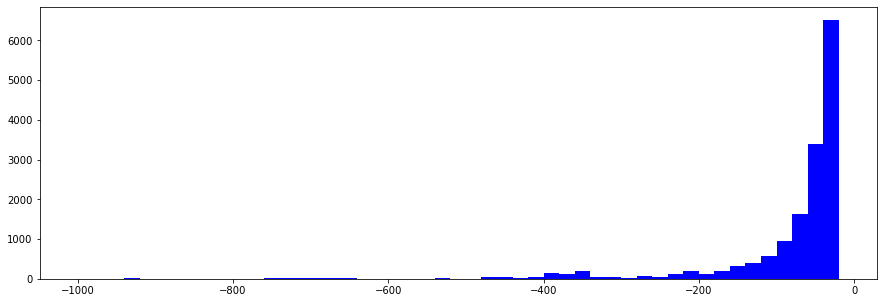

In [292]:
start = -1000
end = 0
step = 20

print()
bs = range(start, end, step)
print(bs)

print('now plotting')
#ig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [15, 5]
plt.hist(listofdates, bins=bs, color='blue')

In [4]:
# Load the data so we can find all the doc titles
import pickle

#Load the knowledge base
path = "C:/Users/tmsch/Desktop/ADS_Thesis/Thomas/"
with open(path + "meetingsInformation.txt", "rb") as fp:   
    meetingsInformation = pickle.load(fp)
with open(path + "itemsInformation.txt", "rb") as fp:   
    itemsInformation = pickle.load(fp)
with open(path + "entriesInformation.txt", "rb") as fp:   
    entriesInformation = pickle.load(fp)

with open(path + "documentsInformation.txt", "rb") as fp:   
    documentsInformation = pickle.load(fp)    
with open(path + "listdocumentsInformation.txt", "rb") as fp:   
    listdocumentsInformation = pickle.load(fp)
with open(path + "meetdocumentsInformation.txt", "rb") as fp:   
    meetdocumentsInformation = pickle.load(fp)
    
print(len(documentsInformation))
print(len(listdocumentsInformation))
print(len(meetdocumentsInformation))

29229
22908
2161


In [2]:
# We adapt the previous function for mass parsing

import io
from tqdm import tqdm
from copy import deepcopy
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
import json
import os
import PyPDF2


def extract(path):
    #extractedtitles = [] # list of titles
    #fulldates = [] #  list of dates
    #docdates = {} # dict of docid-> dates

    #get urls - I guess we do this using a different pdf parser  (pypdf instead of pdfminer)

    PDFFile = open(path,'rb')
    
    try:
        PDF = PyPDF2.PdfFileReader(PDFFile)
        pages = PDF.getNumPages()
    except (PyPDF2.utils.PdfReadError, NotImplementedError) as e: 
        print("invalid PDF file")
        print(e)
        return ([], [], [], 0)
#    except PyPDF2.utils.PdfReadError
    key = '/Annots'
    uri = '/URI'
    ank = '/A'
    
    
    #if document is too long we don't parse it
    pydates = [[]]
    matches = []
    ibabs_urls = []
    ps = pages
    
    if pages < 20:

        for page in range(pages):
            print("Current Page: {}".format(page))

            pageSliced = PDF.getPage(page)
            pageObject = pageSliced.getObject()
            if key in pageObject.keys():
                ann = pageObject[key]
                for a in ann:
                    u = a.getObject()
                    #if uri in u[ank].keys():
                    if ank in u and uri in u[ank].keys():
                        #SO it is an URL, now filter for ibabs URLs
                        newurl = u[ank][uri]
                        if 'ibabs' in newurl and 'trecht' in newurl:
                            ibabs_urls.append(u[ank][uri])
                            print(u[ank][uri])





        rsrcmgr = PDFResourceManager()
        retstr = io.StringIO()
        codec = 'utf-8'
        laparams = LAParams()
        device = TextConverter(rsrcmgr, retstr, codec = 'utf-8', laparams=laparams)
        fp = open(path, 'rb')
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        password = ""
        maxpages = 0
        caching = True
        pagenos = set()



        pages = PDFPage.get_pages(fp, pagenos, maxpages=maxpages,
                                      caching=caching,
                                      check_extractable=False)
        for page in pages:
            interpreter.process_page(page)



        fp.close()
        device.close()
        text = retstr.getvalue()
        retstr.close()

        reg1 = "'[^']+'"
        reg2 = '"[^"]+"'
        reg3 = '“[^“]+"'
        reg4 = "`[^`]+'"
        reg5 = '‘[^’]+’'

        matches = []

        matches.extend(re.findall(reg1, text))
        matches.extend(re.findall(reg2, text))
        matches.extend(re.findall(reg3, text))
        matches.extend(re.findall(reg4, text))
        matches.extend(re.findall(reg5, text))



        pydates = py_heideltime(text, language='Dutch')


        #fulldates.extend([pydates[0]])

        #docdates[path] = deepcopy(pydates)#py_heideltime(text, language='Dutch')

        matches = [m.replace('"', "").replace("'", "").replace("“", "").replace("`", "").replace("\n","").replace("’","").replace("‘","").strip().lower() for m in matches if len(m) < 100]
        #extractedtitles.extend(matches)
        #print(matches)
    #    print(re.findall("/"([^"\\]*(\\.[^"\\]*)*)"|\'([^\'\\]*(\\.[^\'\\]*)*)\'/", text)
    #“

        #pydates[0] #dates
        #matches #titles
        #ibabs_urls #urls
    
    return pydates[0], matches, ibabs_urls, ps


# Now extract dates, titles and urls from documents

In [12]:
sofar = '62eb09bd-8361-48ff-9f48-e3033999f793'
found = False
import os

blacklist = ['81fbf658-79a0-4558-9bdb-145902675c01', '8f1f50c5-34ed-41d1-bada-5f26d1d0f49e', 'e8dbf201-cf6c-4fdd-b5e8-10864b05f8a1', 
             'e8dbf201-cf6c-4fdd-b5e8-10864b05f8a1', '85d04dba-11c8-40aa-9e18-f2f680aeb73e', '87452e40-ec68-4d85-a8d6-d2474ce51b43',
            '58802056-227c-4f1e-92d1-43a9703b6e62', 'f7a239c7-0206-4362-9a4c-bc1f62e3e190', '9ebacb4f-879a-4c53-8afc-93196e9b3bb8',
            'a4b11449-142c-42a8-847d-ace360384e22', 'eea2eb2e-a78e-4ceb-b41b-0781318371ae', '96713794-f69c-4aa8-a055-b7c618b486b5',
            'a7c03cff-2c3a-43c8-ac01-95263de6a0eb', 'd3b12991-f814-43b4-9d9d-fcca8fe9b088', '5f6189e7-d21c-40f8-a752-92a1e3de1d1b', 
             '12ec4a70-6fde-489e-9f83-e39cff4c4b04', '56f4bf18-2a34-4313-97be-5324d3123a2e', 'cac86f4c-d88f-4f87-94ed-ea4c4703187a',
            '3559015e-3c3e-40a8-aa70-ce49163af0bf', '46ca53d0-7d6c-48b9-a2ae-7e6982722811', 'd373cea1-29a0-4168-9e00-2fd55745428f',
            '1aa36333-91e1-431a-9edf-ab2b90f4e401', 'b42388a3-82de-4bf8-8579-ec3a3d92412d', 'c9e65da3-67ac-4152-966b-2edcf1075a3d',
            '9767288a-0d2e-4cd3-8c1a-57cdc672b618', '621c441b-6952-48d8-b198-dfea96a3e2e4', '204763c8-ac8b-4c77-8959-1da380e75f55',
            '7a521a0e-e321-46d4-86c7-1faa572c51f5', 'e7775c01-b634-4c20-bf0f-1a413ef0b4e2', 'a68a2ca7-719a-450a-9e56-096ef5c803a3',
            '5a4216ff-cfb3-4f6b-ad41-92d385ea52b3', '9e82edfa-8a90-4459-90d6-4decbaad8996', '4edd43a0-db28-41c7-8465-921d51d962d4',
            '0f8d2925-f4c8-4320-beb1-0fc0c5e12fa9', '31fdc517-c0c6-4d35-b52e-4c007b1a17a9', 'c147841d-6b78-4628-907a-eb83da0c901b',
            'e4d19b04-bfb8-4fce-bafd-2953a88f7b7d', '9c6cb031-6090-4f7f-9299-4a5b5c14638b', 'db39b374-da5e-40a9-b931-4f0887b32918',
            '99264a1b-816f-4325-a7c6-a20694964f47', 'a3ce0f66-42dd-467e-8bd0-18d379788431', 'c4d6dbd1-22cd-42d2-b6e3-a126682602a8',
            'f1891bb1-c8ad-4b97-bd92-807f196820ca', '56ef2760-d041-4f3f-8544-713b94651b92', '63f37007-7c8d-4e0f-8265-d30cc8d5800c',
            'c2159765-d7e2-40e8-8e7e-7e50bae69905']
#didnt manually check
blacklist2 = ['655ff68e-a8f2-41b6-8af8-c8eb4c7e7da4', '6f9c0c71-c9a7-4f20-acdd-b6048a47c648', '7d4421c5-8770-423b-9593-62594d99f3f6',
             'c2159765-d7e2-40e8-8e7e-7e50bae69905', 'bac2006c-f15f-42ca-88d2-fc8fa608d38e', 'adaed734-f3eb-4a3c-a276-da8c5600de4c',
             '467f4cbe-2598-4250-84af-8e7c67920e42', '1997d0dc-23f8-42b0-998d-331e30791d20', 'b3ba43e8-0682-46e8-8fa4-216d5834d6a5',
             '625ca163-b1bd-4ce8-a8a2-e4266a427a39', 'a3fdfedd-4bf7-4799-9d47-007bd486e9b0', 'bcb826cf-c596-469c-b889-4b38783a7630',
             '79011427-7bee-41fa-9ae8-2e8638a1aa3e', '0cc29069-8b80-4ee5-8dd8-b4d4f8c1fcdc', 'f5907461-ceda-4550-bd46-7c2a1755d44a',
             'bee216c8-1dce-46ea-baef-fa925069ff7d', 'cc6e121c-24c9-46a5-bd9a-40af0cf044ee', '62eb09bd-8361-48ff-9f48-e3033999f793']

def extractor(d):
    results = {}
    dates, titles, urls, pages = extract(path + 'documentsInformation/' + d + '.pdf')    
    results[d] = { 'dates':deepcopy(dates), 'titles':deepcopy(titles), 'urls':deepcopy(urls), 'pages':pages }
    return results


loop = 0
i = 0
jsonpath = path + 'extracts'

for d in (documentsInformation):
    if d == sofar:
        found = True
    if found:

    
        i+= 1
        
        if d in blacklist or d in blacklist2 or os.path.getsize(path + 'documentsInformation/' + d + '.pdf') > 3000000 or 'NL.IMRO' in documentsInformation[d]['filename'] or 'Verbeelding BP' in documentsInformation[d]['filename'] or ('erbeelding' in documentsInformation[d]['filename'] and 'ijlage' in documentsInformation[d]['filename']) or 'verbeelding' in documentsInformation[d]['filename'] or 'Verbeelding' in documentsInformation[d]['filename'] or ('NL' in documentsInformation[d]['filename'] and 'IMRO' in documentsInformation[d]['filename']):
            with open(path + 'extractedDocs/' + str(d), 'w') as f:
                json.dump({}, f)
        
        else:
            print(d)
            
            results = extractor(d)

            # you know - lets just write every document for now.        every x items we write down our intermediate results and continue
            #if i < 2000:
            with open(path + 'extractedDocs/' + str(d), 'w') as f:
                    json.dump(results, f)
            #i = 0
            #loop += 1


ed1f4250-dc5c-4da5-a3a6-0d0b66216363
invalid PDF file
File has not been decrypted
6d25ae81-8955-4c9b-8e53-35dd582a375a
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
Current Page: 15
5336358e-74f2-44ef-8133-94e739ea14ed
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/b3a6060c-ea03-4a77-9d11-37b1dbf21d6b
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/dd0f1dc0-4e84-4404-9d6f-5a02ab300fb0
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
01061d70-80c7-473f-93ac-a49889c9b514
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/b3a6060c-ea03-4a77-9d11-37b1dbf21d6b
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/dd0f1dc0-4e84-440

8caa73a1-5013-414a-a921-b1b26f0b274f
Current Page: 0
Current Page: 1
0a02361d-b913-4957-9db2-4b028568748b
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
5125d5a3-f33a-406b-8af0-47ea5eb6d391
a56bb82b-9028-45b4-8ce4-e29292f5ed19
Current Page: 0
Current Page: 1
1b64bf30-0609-48e0-9819-002bdfe25935
Current Page: 0
Current Page: 1
d176240c-9b6f-4bc2-9715-3632e232db39
Current Page: 0
Current Page: 1
b42db7f2-1dd2-4283-b4ce-1da0095b092d
Current Page: 0
https://ris2.ibabs.eu/Agenda/Details/Utrecht/a792bc6b-1fdb-4c70-a13b-88f2ee4fcb9f
c5627c98-6d0a-48d3-938e-c9fa72b66a78
Current Page: 0
Current Page: 1
8986798d-118b-46ae-9979-70d59f35f2a7
Current Page: 0
de108279-0fb5-483a-a04b-b1cf7241a376
Current Page: 0
Current Page: 1
0618f466-59f7-425e-ad70-9998f50aad9c
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
427b4937-6236-4278-90e9-978eddf0cd17
Current Page: 0
0c55b028-c762-43cd-8a6c-9aebd2464942
310b42b0-708d-41b2-95f8-0d01f2101634
Current Page: 0


fd33e44a-fe60-4b3e-be78-b922ad762ad0
Current Page: 0
Current Page: 1
fb8e1bbd-c380-4716-bb46-6b9d27738fdc
a48c017c-c3c2-4154-9b69-5c7df20a5dc5
Current Page: 0
https://ris2.ibabs.eu/Agenda/Details/Utrecht/66eb74e3-e181-4568-b202-69c2a9357b95
https://online.ibabs.eu/ibabsapi/publicdownload.aspx?site=Utrecht&amp;amp%3Bid=1c806507-5da3-4242-81a9-9d140fc5296b
https://online.ibabs.eu/ibabsapi/publicdownload.aspx?site=Utrecht&amp;amp%3Bid=1c806507-5da3-4242-81a9-9d140fc5296b
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/d6b6608f-7575-44e4-9755-959842d97eb4
https://ris2.ibabs.eu/Agenda/Details/Utrecht/181a57b0-1e67-4c74-9b8d-772368b3b8d8
4349ab9e-3c0f-4be4-93c4-f2e614f1ecc3
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
dff00776-29f2-46c6-a5df-5c97875d2fdc
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
d9d61221-5a8c-4ae2-8e27-43c1d9134246
Current Page: 0
https://ris2.ibabs.eu/Agenda/Details/

8c34959b-c0dc-41a0-bd09-6ba768f7ed88
Current Page: 0
abda5c2b-3654-427e-b872-f2e1efe926c1
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
f22f4317-7b6d-4e6f-b21a-d775504272e2
Current Page: 0
Current Page: 1
e076ae7c-b7d4-4021-8b8f-90b4738d4ddc
Current Page: 0
c3c61c0e-9db2-4c3e-bdc8-8e7c4160c257
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
Current Page: 15
5d8b6c85-5323-4a52-80df-e4f2958ffe6c
Current Page: 0
cec85225-e47a-49ca-b353-329f4f7df890
Current Page: 0
341806c9-773c-4386-a133-729e2302bc08
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
d8df36c6-43f0-44ca-a7a5-4742668ed1a4
f8291e89-53bc-426d-a947-ad8cd671ad8a
Current Page: 0
Current Page: 1
4eb83fd8-0891-48eb-9441-548c9289cd4c
Current Page: 0
825d033e-4fbc-4a69-8c19-2ac

28a42a46-aa0b-41b9-b68a-1ff7a370365a
Current Page: 0
46b493a1-6e5b-4b72-bd89-124579b75509
Current Page: 0
81530135-2238-4a2f-a555-7d042da3bf80
Current Page: 0
Current Page: 1
1b6b6945-1156-4999-a950-6360c06488a1
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
Current Page: 15
Current Page: 16
Current Page: 17
Current Page: 18
83c11000-37a5-4669-8db7-05c36a409093
Current Page: 0
Current Page: 1
fe16a8fc-ad0e-4c6c-887e-16302c834994
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
43f9563c-88b1-4f63-a858-0017784d1e3a
9f7fd13a-29fd-414a-9097-cd8bc064c48e
Current Page: 0
7c5d4c57-9cc2-4a5c-9479-aa9c2c1f4376
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Cu

8691da00-8f07-4491-bcc4-b35016813363
Current Page: 0
Current Page: 1
2e74d434-0432-488e-b111-491772ec672c
a61890cd-afd3-4a9d-b0b1-4a466a81cd1e
Current Page: 0
de2f41eb-0a73-4f3f-be23-a4e8195a9f38
c7ff9051-dd21-407c-aac6-8bac8a64c1c5
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
505ea9b0-c567-46f6-becc-844a9d8b8751
Current Page: 0
e4dc3343-4e69-4ddb-bab0-9b9f2a26afd0
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
ce5ddb6f-bb01-4671-98ea-49afe62b5130
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
Current Page: 15
Current Page: 16
Current Page: 17
Current Page: 18
c9968c79-0330-4172-9c8e-1290d2654f8a
Current Page: 0
80178e4a-44fe-407a-841e-c70cc404be93
Current Page: 0
185384f9-2fbe-4de4-b0c7-26b20f0dbc8d
fbe89d25-62f1-4a1b-9476-c619ad4e8b8c
Current Page: 0
Cur

6e9f0ff2-063d-47ab-8055-88c8a02b7c17
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
b8ed8fef-5b86-44f6-83d3-3013fb662a3e
Current Page: 0
b39288c8-9e5b-47a5-92ae-f46ab5ba9ac3
Current Page: 0
96f59b8d-ee14-48fd-973b-ed1dae303b82
Current Page: 0
Current Page: 1
Current Page: 2
37022509-d09f-4f94-8ec8-b3d816928b20
Current Page: 0
Current Page: 1
f14fc1ea-d3d0-45f2-b01d-503fd4e6d7ca
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
a7f43655-ac12-4b3f-86bb-bc887067c842
15ee71a4-5bc6-48c0-b291-db9a9e029958
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
596521a3-d5dc-486a-820b-d8855906a7af
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
ae024745-5

0364fb0d-a09e-4ad1-9675-eb974ab6019f
67a1cb3a-b13a-4ac9-87ea-7bc9da8ee744
b94131d5-b372-41d9-bfd6-5d22ac46c585
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
ca082302-f37f-40f1-8b56-c0577d2a0b81
Current Page: 0
Current Page: 1
d7ffead9-16c2-45e9-8af5-97b778c83f7c
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
93514c09-40f6-4062-9e7e-d4452b87c8b9
d91ddd24-a68c-4905-bc09-1fca5cb5fb0b
Current Page: 0
5a6e5ffe-65b8-44ed-bf1b-fa1266ca1f3d
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
Current Page: 15
14facc8d-9b15-4466-bbe1-bf4717021d6d
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/7ec881d5-01bc-47d7-ae55-b004d10cfbf2
https://ris2

88103c8a-20e8-4eb8-b2b8-6482769effc6
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
0cf36b33-b707-4530-a603-6fbfd0d16c26
d4d4cd15-7163-46ff-9dc3-f07615b35534
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/e9c359c8-d606-42a2-8bd3-37240d7eca34
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/ac68b701-758d-4bf0-b9c9-57de35ddf153
1af21e8d-b78b-4f69-a950-66f00f43a972
Current Page: 0
c3a9a4d8-47f0-4c28-be3b-d8a4e9309d40
Current Page: 0
e9efdc80-d28c-4dde-8dc8-2856e5a8aecd
Current Page: 0
d4ba2faa-785a-49c7-960b-8882d2218fb9
Current Page: 0
a1cd9ebd-6794-4017-aec7-f5500a829e13
906ee13b-84d6-4cbd-a738-b6b18dfd8033
5096818b-db90-49ed-98b0-b5e6d29aa833
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
ab061ce8-0113-4805-9a73-c35cffa27106
Current Page

cb0a414c-80b2-4bc7-a73d-6f89535ac232
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
9e5dccb4-3b4e-4580-ab20-46dad8536a35
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
Current Page: 15
Current Page: 16
Current Page: 17
2f1005ec-3b54-43d1-bab5-782c762bb9c0
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
775ece9f-7a02-4ba2-b76b-af54919224a4
b83c453d-41d5-4dd5-8ad6-4c5a0bfc8b76
40a53d78-1a1e-4c14-accf-4e212cafe9dd
Current Page: 0
Current Page: 1
254ee9e4-f45d-4f52-bf57-721656112ac5
Current Page: 0
https://ris2.ibabs.eu/Agenda/Details/Utrecht/9d8605e8-f43e-49f3-997d-0df62a4a2e8d
https://ris2.ibabs.eu/Agenda/Details/Utrech

1ba9bf22-5189-464d-b1a3-7bd5085a5c8f
Current Page: 0
Current Page: 1
Current Page: 2
251a396e-f330-4849-9d5e-0e2d6fd6ea8b
Current Page: 0
217cef40-6869-48fe-a08e-7a24cb66f47b
Current Page: 0
0ea95770-c135-4c7f-99f6-34bdfc584880
Current Page: 0
ddac9b9b-e78b-4a30-bdb9-82a80d747255
Current Page: 0
93ca8ed2-8548-4383-ae42-ec097356f731
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
9b81a505-3d29-482b-8219-213840123f2d
255e163b-1069-4a38-a084-e52c6510849f
874e9981-d5eb-4138-addd-e984cac2a60c
Current Page: 0
Current Page: 1
Current Page: 2
88b356fb-464d-493c-b6dc-e2c3098ce72a
2dd299d7-bef4-4923-aeff-057f8383544e
Current Page: 0
6e914cce-899e-43d2-b97f-3e249e8c92fe
Current Page: 0
Current Page: 1
bf890dd5-06f6-4019-aa59-73cba52a1407
Current Page: 0
6fc9c6bc-e430-4783-af76-5058df0c88f5
48d255af-5044-44c8-b8fc-015b0f78ba6e
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
708d20ae-1745-43a0-86de-ea778da70079
Current 

98e35b82-6185-41ae-8415-7a614658d0a4
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
c82ccf70-c992-45f3-bd60-687d0de2f8e7
Current Page: 0
b9030f32-57aa-4ae4-a4d8-3b8518ce9182
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
2564151d-a976-477c-8576-50038a508077
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
15d56fc6-992a-4d3b-9bdb-72fe66bbfa61
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
1f0e0aa7-3a72-45a0-bf69-7abd859e3ca3
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
8369220c-93f4-4580-a914-631e81063818
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/447b89ba-f685-4c4d-8485-d27d1c7cf899https:/ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/447b89ba-f685-4c4d-8485-d27d1c7cf899
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/d1d3c755-14b0-4429-9f54-10f37506c1fe
https://ris2.ibabs.eu/Report

f6a5ee13-0c95-47da-a6b4-5afea3d19682
Current Page: 0
Current Page: 1
4d500d1e-8dbb-42c9-ab56-f7e4f7002c08
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
e637f9f5-b5fa-464b-b1c9-9c653bcedf22
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
6f2d19d7-12e7-4479-8f0f-963e247c9b7e
Current Page: 0
d1ca3d8f-e699-4e2d-a8a6-c4776ad8a65f
Current Page: 0
e6b1ec5d-5b42-49cd-9b2d-ba19dccf2af0
Current Page: 0
b1360129-dba7-4896-b130-9248a0578831
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
e0658780-067f-467e-b329-d76795c35571
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
e27add97-d85b-40c6-ade4-7b83615bdb68
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
348dfbb1-d109-4bc5-adab-0a

10551e3f-2b9f-4d59-b49a-144aecf64f1c
Current Page: 0
c98f5ed4-dc41-47e1-9b0e-78e398d79758
Current Page: 0
9bbad1c5-c1d2-46da-890e-6622bed2a285
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
7daf69e3-6e67-45a4-9c06-83e8945bd75d
3f18577f-4658-4998-a86b-2522a48de633
283d10dd-9026-4ff7-b94d-22fda3d85a8d
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
23b41bf3-a8fb-4526-a449-0a174abf271b
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
b9fdce12-e49d-488d-9669-a1ceac91794d
Current Page: 0
Current Page: 1
Current Page: 2
4dcef197-a130-4789-8616-77c79bf61615
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current P

7975a45a-ee16-4435-8b6f-14bf4b023d59
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
d12db98f-4da6-4327-92ee-8d6a999d9b6a
45a90001-802c-4aed-920e-43014f5c8b25
Current Page: 0
Current Page: 1
Current Page: 2
77c26cf9-4dc6-4f9b-b42f-e1d1ea176fd1
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
56c223fd-a893-46c8-a554-a095218a8e8f
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
Current Page: 15
d4832d96-e0ef-436c-9f1f-183190909d01
Current Page: 0
Current Page: 1
Current Page: 2
fe4f59a6-5e44-437c-ae69-5ede198e8786
Current Page: 0
Current Page: 1
814a990f-177f-4054-a60c-86affc6e4516
Current Page: 0
Current Page: 1
d76be90f-49f0-45c1-86da-6531053b7dc0
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
47e7c8e0-6020-46f7-89ec-18caf0803631


b49eb6f2-a789-45d3-aa92-35ea81e78686
Current Page: 0
9d80e8cb-1296-4f2b-b212-f826fc59bafd
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
1faaee85-0e1a-4c5a-8784-dd1ce6b25d24
8f9576ed-fafc-4c75-b97f-b936edb19be2
a2fb1617-a439-4056-a5ff-c77646570573
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
6115b414-e99d-4201-be1c-91d3db00ea56
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
c30dc6d0-e511-4a7f-b052-303fc256f2a5
Current Page: 0
Current Page: 1
Current Page: 2
359e54af-108e-4671-a612-c57e629f01aa
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
155bcfa0-ed96-42d4-a1da-6ac3

cf1448b3-f173-4b51-bc0b-0a61fd4595e5
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/ec834302-bb94-41a5-a1be-d43352987cec
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/c7b04fbe-2701-4b93-bd35-14fa2838b86d
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
95e9003b-2212-401e-bc3a-5c86e4f6c316
Current Page: 0
8a42d81d-9596-4ccf-ba3e-674fe5e3eeaf
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/dc257a6f-6896-48b8-9db5-b4a721df50d7
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
9f4ba482-fee2-45b4-ab41-3485859f544e
Current Page: 0
d9926456-7efc-46f4-8db6-7df87e088c27
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
756e2f99-b3d5-46a

e5f2773f-f5d9-4909-b983-a1c854ee07c6
cfed78d2-4887-4aae-9421-f159bd48f835
Current Page: 0
Current Page: 1
0c57421a-2857-4851-a1b8-76b02dc38258
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
0bf039a7-4b0b-48da-a5d2-0569bfe5d5fa
Current Page: 0
eafd4fa7-2784-4e9c-9a5b-084b3680664d
Current Page: 0
Current Page: 1
Current Page: 2
f1519565-d13a-41c6-9775-880188ea8148
Current Page: 0
https://ris2.ibabs.eu/Agenda/Details/Utrecht/53c1e222-b560-401d-bba7-4400de697bd6#5e51211e-1eed-403d-a915-fdeb0c19ce0b
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/5bc58cb6-860a-48b9-bd17-3e5dd72b9952
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/64d1d755-c00a-41d4-a994-024911e2d912
7afe078f-a72e-49f3-befa-93685526e257
Current Page: 0
Current Page: 1
Current Page: 2
7272fbb8-fda9-4028-99bd-2f4dd9b9a681
Current Page: 0
Current Page: 1
f088d8a3-acf0-4f93-b0cd-8e0c495c7cc7
9ae7258b-0f28-4422-8f7c-8a06a7390b0d
Current Page: 0
237560f6-6f14

79607e80-8b24-409d-a694-c0be62e9b6e9
2cb5f19a-3cc6-4741-bafb-35424263b7a4
1f80761b-3430-4c8e-94d6-c68c91298369
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
65697f14-1a70-496d-bde4-a7175efb2d05
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
29545ea5-5f77-46be-b4d6-a5f5e1e60b39
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
8434fe79-cd7a-40ea-a95e-bdb93d920e1f
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
575b9a8c-6c3b-44e0-bb84-a71f88c16174
Current Page: 0
Current Page: 1
Current Page: 2
e38ab19f-5657-4f49-a362-5854135c84b1
abab47b0-cb6a-4c57-b85f-410453be12a5
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
c2bfcecf-1980-4edb-ae0f-4edc10f0e1e1
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
a55e9b34-bcb2-4b87-96ac-3f2198c73cd6
02087915-e7c7-4947-a8ab-fbdccb7f5aba
Current Page: 0
Current Page: 1
Current Page: 2
f4fd018c-c7e3-4b27-98a2-7a6b213bc679
Current

1b8353ad-1570-48a6-93b1-d55e7df13b10
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
55bf09d4-3db5-444d-a5c9-cd1a0cc7fd07
Current Page: 0
85437aaa-32d3-4f4f-9608-2ef43b3b7206
Current Page: 0
29688b79-d93b-45c6-b4b0-169fb9fc9b84
Current Page: 0
Current Page: 1
57d13f41-a561-4c48-9ee1-54f01d1cc173
Current Page: 0
5c92a715-bbe7-47e1-9846-7b5c6c8a32f5
Current Page: 0
a48537fa-1721-4400-a6bd-db5d799a7249
Current Page: 0
3e7ef809-9fe1-4835-ad9e-445d78cd59e9
Current Page: 0
6d0bcf2b-3862-4f2a-bc0e-80931af20814
Current Page: 0
a6cbd047-abc1-49d2-883c-d7c99582d2f7
Current Page: 0
67a83c1e-b694-4909-81f9-c28371c11326
Current Page: 0
Current Page: 1
4df8fafa-4090-4eac-89da-4db5a52aaa9f
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
c0c6b0b9-dc34-4ca8-b639-913557305b55
Current Page: 0
f9104bcf-e261-4b67-988c-da468f75be0b
Current Page: 0
a405fb6c-ea1e-4cab-a5f1-1cfd7672089f
Current Page:

740c4728-cc15-4060-a60e-6cc532006dca
Current Page: 0
https://ris2.ibabs.eu/Agenda/Details/Utrecht/5d5e3a41-066b-4a29-a0eb-fa3efc772c46
https://ris2.ibabs.eu/Agenda/Details/Utrecht/9b3bcc53-83e5-402c-822b-3d7624d0f237
https://ris2.ibabs.eu/Agenda/Details/Utrecht/d998a211-0c87-4381-8bbe-2f652ea4de3a
26c89ce3-ee2c-4714-b59c-19ec24668b6c
Current Page: 0
d7caf753-d3c5-431f-a984-146e91a3195a
Current Page: 0
8f46c19d-da52-4b4d-b3bd-a8b8d6d26a3f
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
1f48d713-819c-437b-ab29-6c12eaede124
Current Page: 0
Current Page: 1
a172a527-a975-430a-922a-e1c8bece71f5
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
ea3420b0-115f-454f-a9ca-68381d94cdc5
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
6c5ea835-7201-4e06-b575-bb89abe

a05ba551-a63f-4bcc-835c-5e8fbcd96545
Current Page: 0
25eb7828-b8ed-4970-92ca-01bc7cab2556
Current Page: 0
Current Page: 1
4e5c617e-2eaf-4920-852d-ca0e23e1bc5d
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
2273d675-e38c-44aa-98b7-9b11dccbb352
Current Page: 0
Current Page: 1
c0b99ef9-26de-458a-bb80-52fe13990ad3
Current Page: 0
14fdb875-1d9d-4597-ae51-135a901fdeca
9b1811a4-ee5c-422b-90a3-2eebc47d2bfa
Current Page: 0
564c0ed1-6b2b-4dfd-9c93-a9394d9bb181
Current Page: 0
dc7799db-6bbd-461d-b2d8-4e147d15ecea
Current Page: 0
Current Page: 1
4116678d-4bb2-4638-a930-b53868f65ef5
Current Page: 0
bedaef9b-d1cc-47c1-a346-8af7c22f7971
Current Page: 0
72e129a3-5fe6-4ad4-a204-8e9d918c5d48
Current Page: 0
09ee0e51-245b-4f79-b1e1-a4aa94b54e82
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/96478c96-87bc-42e6-9db7-1d2db1b20c17
Current Page: 1
Current Page: 2
6f88c5fb-871d-4f3b-b0ee-0f7a46107cdb
Current Page: 0
72452788-8c0b-4795-84f4-74fd62b8f38d
Curr

8aa7fd7b-ab1e-41c2-9f4a-d0ec80c8b31d
Current Page: 0
d8374f9d-558e-4610-b40e-61777763fa44
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/df1737ac-2a5a-424e-ab74-d8279b661e63
Current Page: 1
https://ris2.ibabs.eu/Agenda/Details/Utrecht/5235fb18-b246-47fa-9d56-56478ae70eaf
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
566be486-179f-49c7-957b-3a4084b600fd
Current Page: 0
190fbee7-840a-49f1-92f9-29972a1727f6
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
ea384119-1df7-435e-99ea-497e4695e284
c18927a7-54ff-46ff-9b49-e583f988dead
6b8be238-c2cb-48fa-9e95-c07db76d890b
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/637f1713-0223-459a-889b-7be55e782334
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/c9bc9984-02fc-4fc3-81ff-5f03f68b7a3f
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/96478c96-87bc-42e6-9db7-1d2db1b20c17
https://ris2.ibabs.eu/Reports/V

c9e332a0-c6fb-4d8b-9da7-79c6114c172c
Current Page: 0
Current Page: 1
https://ris2.ibabs.eu/Agenda/Details/Utrecht/b39c23ff-8c7f-43d5-88b0-b4fba609aad9#fab88989-d4c3-4130-8f6b-391a80afb477
https://ris2.ibabs.eu/Agenda/Details/Utrecht/ccccec81-35a7-4189-aaa1-82afaa7f4f7c#5be752bf-bb89-4a1b-af95-1220221499f7
Current Page: 2
Current Page: 3
Current Page: 4
b88dc97d-14d5-49c6-a8c7-1eeaf99775ed
c5fbeb64-6cb8-4e9e-9af4-ea8bb94768d6
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
36c31ffe-da2b-4f72-a1e9-b22f8a703e00
Current Page: 0
b7f34dcb-88bb-465f-8b74-eaf714aed5b8
Current Page: 0
Current Page: 1
Current Page: 2
4d123561-3556-42ee-8275-d05e24dee37d
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
566e102c-c598-45fd-b706-8af918196e1e
Current Page: 0
Current Page: 1
5c9e9396-d400-414a-ae70-9f56821fd22f
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
003c0080-0ec1-4a40-b810-6c4e7bd58227
Current Page:

1d295e8f-d3a1-4605-8765-aa4f627553f2
Current Page: 0
8fc6be37-e748-4c17-a3e4-c42fe50cab2e
Current Page: 0
Current Page: 1
Current Page: 2
0fa2bbdb-4487-497b-9af2-92a4a2430e9e
f5c4e21c-f010-42ec-8201-d0ad421b67ff
Current Page: 0
bf32463d-9317-48b1-93f7-6c5d43f506c8
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/665fd74e-2fff-4498-9a1d-718039b40577
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/0a80db85-7e07-4a26-9a87-c8881d9a15ed
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/0a80db85-7e07-4a26-9a87-c8881d9a15ed
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
ecad394b-cc7d-45e0-8c30-c24ea5d296fa
4086d714-6902-409a-a6b5-8ecf35a745f9
Current Page: 0
2869be77-c2f0-430d-bdc2-4b7b0491baf9
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/81a7730e-86f3-4f53-a060-fc761006ce87
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/84aed5e7-14b9-441d-a6d6-a9a4fb10d256
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht

32c16bca-91e1-40f5-ac48-73ab85b0fd6c
Current Page: 0
692a2f00-80cd-433c-98ed-86c346ab81c6
Current Page: 0
Current Page: 1
https://ris2.ibabs.eu/Agenda/Details/Utrecht/8964b042-560d-4eae-a2d7-cbb2458f066b
https://ris2.ibabs.eu/Agenda/Details/Utrecht/2983aacc-cb54-4df0-8cda-29a14b7ce236
https://ris2.ibabs.eu/Agenda/Details/Utrecht/bee8fb33-f90d-40a1-ab93-4ad443dafb18
https://ris2.ibabs.eu/Agenda/Details/Utrecht/73872a98-4790-401e-81ef-d377160c9487
Current Page: 2
https://ris2.ibabs.eu/Agenda/Details/Utrecht/47ec3cf1-f2b9-492c-8f28-ecfef8ec97a1
Current Page: 3
1eb4a195-ddfd-42d4-8629-91f50ef01f7e
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
018948fd-c38f-4f82-a156-82f60ea45839
Current Page: 0
54ce9d1e-5138-4f70-adc3-b4a4698e50bd
Current Page: 0
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/d4b156ce-9b6f-405d-9f5c-6eb08357571a
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/dc878c19-3fd4-477a-88d5-64c882dbcdb9
Cur

7da875ce-d310-4a80-8942-bb4b789c7243
21fb4ce0-f3a4-4fec-8cf7-59ba0ba413e3
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3


29721081-a87d-4a49-87ac-b9805a3f0d43
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
2be1d913-9517-4879-806c-7891c440ba5c
Current Page: 0
Current Page: 1
Current Page: 2
7b5dd90f-5eb9-4324-9cea-f755fb2c76eb
c259494e-5691-4980-8dd7-ff7495f683dd
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
9118dbf9-ec9a-4386-a384-990c53c85234
Current Page: 0
Current Page: 1
Current Page: 2
33296c7a-5694-4fbc-96ce-3b87ea7c2663
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
Current Page: 15
Current Page: 16
Current Page: 17
Current Page: 18
7ae05e56-6b24-4b86-aee2-8f7a18ac4d18
Current Page: 0
Current Page: 1
fa66270b-cec0-4981-bca4-b92ace0697a2
Current Page: 0
Current Page: 1
Current Page: 2
a620adab-93de-4d6e-806a

a9522768-3bb3-4bf0-b3fe-fc65a750b474
Current Page: 0
3e35df85-352c-44cb-b5d6-84e5758f3d14
Current Page: 0
https://ureka.utrecht.nl/app/document?url=https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=eb5a4eed-a496-4375-901a-ef81fe67dfd4
https://ureka.utrecht.nl/app/document?url=https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=44de97e4-85c1-450e-806b-2646180e1aaa
https://ureka.utrecht.nl/app/document?url=https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=0189937e-fd7e-4e43-825e-0e0c3ed8e1a5
b0b2afde-9792-4c9c-a58e-e29164daa1cd
Current Page: 0
Current Page: 1
a4558f63-3532-4c48-903b-c905ba73ef14
Current Page: 0
bc5b3cd1-f71c-4a20-aed0-47c66c5b0992
Current Page: 0
d0ad5dca-7a7a-45a8-b5c2-5b3c7203a171
Current Page: 0
8108ee75-7eba-4e27-afac-80a6d7fb755e
Current Page: 0
c5be54a2-852a-4969-9cec-6c3b39bc83c5
Current Page: 0
28bdd355-391e-4b8e-a635-9acb8ca50e7f
Current Page: 0
6ba463ff-9482-429b-af8c-60c07247bbb5
Current Page: 0
f2a1c9ad-cac8-448e-87e6-cd771460ab5f
Curren

654d7664-5da4-4e22-b133-6a49337cda3f
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
b0aa195b-fc8b-4257-ae76-abca7bf98e12
Current Page: 0
83c79461-271d-4b5d-9155-358314c1e3f6
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
feafcf0c-db27-45f5-9895-6448a2d9e810
Current Page: 0
e1033b08-66eb-42d5-92df-78ad0401b2fa
Current Page: 0
b9072025-1178-4d43-9e99-5e2785755c53
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/c2d3578f-e91b-4bf2-9cf8-f4ca101e0b4f
Current Page: 1
29f27b58-aeff-472d-aeb6-700e5b0ee4be
a91cf9a4-4631-4083-9021-ee5b67f65368
Current Page: 0
b396cca7-a5b9-427b-b17d-05a73dec5215
Current Page: 0
https://ris2.ibabs.eu/Agenda/Details/Utrecht/39c47303-6363-41cf-95c7-d6fdae140ffc
Current Page: 1
d7dd8656-797e-4a19-b543-9258fe68775b
Current Page: 0
89bd1b71-2db8-4535-8f8b-bbaf19d5efa9
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
https://ris2.ibabs.eu/

59912dbc-9028-47c3-b9ea-d81913cbfa54
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
0123250d-411f-4e32-9cec-4ebda5e9a16a
Current Page: 0
4bd02661-2c7b-41d0-8e69-fda755797452
Current Page: 0
69cf7dc8-60ca-49f0-8cf1-d0b6b465731f
Current Page: 0
af466472-6228-4b41-baef-f08bfa8b0b1f
Current Page: 0
c3e64e39-24b8-4306-b60e-cb3e1b717f63
Current Page: 0
e04c10e7-739b-4c2d-9f2b-a71cbadd07d2
Current Page: 0
Current Page: 1
Current Page: 2
d0ecaa31-8c7d-4c4e-a976-09619ba70484
Current Page: 0
b9d595f0-0197-4164-ab55-79a5a50b8e06
Current Page: 0
Current Page: 1
3884ab4c-4447-4c1d-ae40-ef1a8ebbb511
Current Page: 0
6bca1f47-ef80-46a2-b06b-60d0af7eafe9
Current Page: 0
Current Page: 1
Current Page: 2
a151be97-773f-445b-a7d9-b8ac1b60b87e
Current Page: 0
60d14dc0-8eba-4b6a-8507-e32a4ebd98da
Current Page: 0
663edad0-870e-4c27-9655-e3eb1ed2d2fc

158e1571-8ece-403b-bcfa-2f5a0f20294b
Current Page: 0
d88242ea-7539-43f8-bfb6-71867c792825
Current Page: 0
Current Page: 1
Current Page: 2
https://cloud.spinque.com/gemeenteutrecht/ureka/document?url=https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=32ab37a0-9518-4b35-82b9-ee2a2d97bea7
https://cloud.spinque.com/gemeenteutrecht/ureka/document?url=https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=ccde9572-3790-4f19-b5ad-c3e52efe9569
https://cloud.spinque.com/gemeenteutrecht/ureka/document?url=https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=39fa4703-bdb5-4c45-b001-d5fc43297b5a
Current Page: 3
https://cloud.spinque.com/gemeenteutrecht/ureka/document?url=https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=b0ecd39f-a3a7-4345-95a5-35df34620bcf
https://cloud.spinque.com/gemeenteutrecht/ureka/document?url=https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=0f836179-de32-4405-8257-5a78fdf8a1ef
https://cloud.spinque.com/gemeenteutrecht/ureka/document?url=https

9dc5df13-4b40-4375-baf3-fb967b7ba11e
Current Page: 0
3400fdee-6b09-4679-80e0-a303b9dff605
ac845dbd-698d-4353-86fe-b7a8ef9bc485
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
Current Page: 15
Current Page: 16
e13532b5-9a05-4035-ab6f-45a922d137e5
ce0a617a-2d83-49dc-800e-90fa96d34189
Current Page: 0
Current Page: 1
b6a24385-35d1-4e2d-85c2-260bc80365d0
Current Page: 0
bdb7e338-90dd-4311-8234-2a3af7fa2699
Current Page: 0
85c34575-b76d-4614-a2f7-73dd2ce00705
Current Page: 0
b2b42b6b-3aba-4a24-a017-c27ed49bb350
Current Page: 0
e441f0bc-ec02-4c1b-8932-039a89d22235
Current Page: 0
68cbe274-0858-40cd-bd2c-82048b193dc5
Current Page: 0
c8f9fe09-cf93-429e-86ce-1607833dca5f
Current Page: 0
https://ris2.ibabs.eu/Agenda/Details/Utrecht/836afc54-7d5d-4221-8cde-38a53ea81777
Current Page: 1
Current Page: 2
6e4

e8c681ec-ab24-4a26-b3a7-f3913bb8943d
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
fdeedf2d-3ed0-4677-892c-e3230ca5d670
Current Page: 0
Current Page: 1
7d1f2c73-8a13-453f-9fad-1a87b2a8b825
Current Page: 0
68a9767a-0616-4b69-80ba-8866b93d9c3f
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
c66e20aa-95aa-4cb8-99d1-83c443c02708
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
ba09901a-ffdd-42d8-a39f-4304083dc5e8
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/aebc40f4-b4a3-467d-8ce1-41ef4aee9535
Current Page: 6
8e8f78ca-c585-45da-b0e5-42b3a78ebd52
Current Page: 0
ea1f38ba-b3bf-49cb-85d5-f8bb0518d07c
Current Page: 0
a6530a28-1138-4508-be0c-ee7ba8318b47
25cc8ae8-0df0-4f2a-8b25-694a70723805
Current Page: 0
70952f79-d231-4f55-984f-6d27a0fbc7e9
Current Page: 0
Current Page: 1
Current Page: 2
cb41d39e-e3be-4c9e-8ed3-d44cbbdcf408
Current Page: 0
Cur

a64edd73-5a71-4a61-a73f-923d3609573f
8f89e713-a681-4fc5-858b-3d953498650a
Current Page: 0
Current Page: 1
Current Page: 2
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/8d12762a-7617-43d4-a734-2ec10cc741dd
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/60f4d1a1-49dc-43d6-adb6-67013380f2ff
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/9bc83561-e855-466a-b23c-4b488d0f4dc5
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/0ac1ad91-e738-46e7-bcf7-f36daa01e1ec
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/d5e4a2c4-1e73-4c38-b91d-8b94af0c8bb8
Current Page: 3
Current Page: 4
Current Page: 5
9039dde8-299c-494a-995a-e082941012b5
4ee6b77e-4319-4163-becd-845773e953aa
Current Page: 0
Current Page: 1
https://ris2.ibabs.eu/Agenda/Details/Utrecht/b4698dcd-23b1-4d7a-a105-9e7efe1b6f17
Current Page: 2
01019a4a-af0b-4cd7-80f3-0f1830576d77
Current Page: 0
Current Page: 1
Current Page: 2
80aeb692-8a48-454a-a8dc-bda23a0588b8
Current Page: 0
Current Page: 1
Current Page: 2
Current Pag

95105eac-a584-4be5-ab4b-4009f255f4c6
Current Page: 0
9f8c85ed-cf96-4727-a29b-2dca1acefe3e
Current Page: 0
Current Page: 1
af222f94-eb50-424e-bdff-428e88c088ed
Current Page: 0
Current Page: 1
44f83535-bdf0-4d72-a8cf-cf527528b67b
Current Page: 0
decb47ce-ca4c-4694-9029-b87e0d07943e
Current Page: 0
bbe03fa3-3050-493a-95a2-42234d0210ef
Current Page: 0
cf5fdf9a-923d-4022-8402-aa35d2c4e2c7
Current Page: 0
Current Page: 1
2baa0057-5778-4787-b8eb-ca9886266a79
Current Page: 0
Current Page: 1
f42271cf-6682-4335-9f30-17e7fce36d73
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
8a3752cf-6121-44a4-b398-d4a71480e078
Current Page: 0
1ab807d7-9f2d-4ac3-99e1-446affcd2760
Current Page: 0
d60c6934-c6a4-4abc-98bd-693fb508ab31
Current Page: 0
Current Page: 1
Current Page: 2
d41e491a-4ab0-46ae-afc3-8573864bcc6a
Current Page: 0
661d9379-4327-4bf1-a0e1-ba7a94933955
Current Page: 0
d729b3e7-0b0b-4ab9

6944375b-6d37-4506-a8e9-54583594d14a
Current Page: 0
Current Page: 1
https://ris2.ibabs.eu/Agenda/Details/Utrecht/2da6ab2c-a282-4708-b21d-deb1df683d1f
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/9929b808-33fd-4da6-b5fd-ce15c09534c3
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/32bc9b75-e6ec-4b8b-b8d6-8a8777e58d36
Current Page: 2
0801d455-2ac0-4629-add0-622a298d7888
Current Page: 0
53e6de9c-e624-40e3-8641-40cb61bd9cf3
Current Page: 0
47da9614-9826-460d-a384-2e342e2a56de
51eeb3bb-fcc6-4acb-9776-8353c26c547a
892801f5-1f85-4c7b-ae45-455f6bbe704c
708b2c7d-59d7-402d-985c-5b07572d464e
Current Page: 0
Current Page: 1
f85bd1fc-5999-4bd9-9bbf-1af879dcf60c
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
5faa49bc-10cd-4117-ab4e-33c54a1c667d
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current

1ac7e37a-3a0c-472a-89e2-826ac6923fd4
Current Page: 0
43a6cd82-ec51-447e-b5af-af339aefea2a
Current Page: 0
Current Page: 1
450df183-65ea-4cd5-9f94-94f68cf2e43f
Current Page: 0
dabfbfab-cace-443e-b7dc-049beaf530e6
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
https://online.ibabs.eu/ibabsapi/publicdownload.aspx?site=Utrecht&id=4cfc16ff-5005-45da-ae7f-920666a749b8
https://online.ibabs.eu/ibabsapi/publicdownload.aspx?site=Utrecht&id=f6666399-1d0c-4563-83a0-a2be500d42bf
https://online.ibabs.eu/ibabsapi/publicdownload.aspx?site=Utrecht&id=0268a350-107d-4f4d-8591-09dd5de1abe6
https://online.ibabs.eu/ibabsapi/publicdownload.aspx?site=Utrecht&id=0268a350-107d-4f4d-8591-09dd5de1abe6
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
376ab2cd-650a-41e8-bdbd-1d4df2b0c406
Current Page: 0
f2740d05-3cbc-409f-aa7c-4a140af61d82
Current Page: 0
d21322dc-144e-43c8-af13-764aca7654a5
Current Pa

ea985a9a-cbac-43ec-ae65-a302c08f9597
Current Page: 0
89fb84dd-bf83-45a8-91b6-c2488366021a
Current Page: 0
c0d71f85-c3cc-4384-9856-517b53f59f7a
Current Page: 0
3b6ca927-7fbd-454d-92d3-7b5e2692389b
Current Page: 0
Current Page: 1
0a85094e-ecf9-416d-b05a-50f386233f38
Current Page: 0
41256f03-f57b-4298-8010-b48d109f6e72
Current Page: 0
e6bfe048-03bf-4fa3-8a7a-d71e9a7614c3
Current Page: 0
f6fc4139-72b2-4291-b600-2165e43dc971
Current Page: 0
Current Page: 1
e3282fa7-e301-4547-9464-0f034c892921
efe7f2fc-3e42-40f9-a3af-73334effbfe3
d51a6b7b-7958-414b-8e90-bcbe67271483
1ea4d369-15bc-447d-9f07-fb2d048743bd
95aae0d2-9e93-4b6b-bfcc-eeb408d7c491
7e983cab-618c-49bc-8bdf-d938120d66ea
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
54470230-c2a0-47ff-845e-16e7620bd50b
Current Page: 0
5c19c203-8bd9-4e77-954a-b7e130c58f20
Curr

2a5dbe34-0b61-4aeb-8f64-29fb2b3669da
Current Page: 0
14302829-d600-435f-b270-3d3a4b1f49b9
Current Page: 0
3ef1ec3f-82f1-40a6-ade2-7585e2c141b6
Current Page: 0
38e47053-cce5-4f88-ad75-4348e223abf3
Current Page: 0
Current Page: 1
https://ris2.ibabs.eu/Agenda/Details/Utrecht/14938916-a57d-4f1d-aa46-9cafd3729d39
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/6fb6c649-e573-4781-9aaa-a516d983e291
https://ris2.ibabs.eu/Agenda/Details/Utrecht/27ca45d9-183a-4ec6-a7d7-e397358811b7
https://ris2.ibabs.eu/Agenda/Details/Utrecht/27ca45d9-183a-4ec6-a7d7-e397358811b7
Current Page: 2
Current Page: 3
f507fa82-8dfc-47aa-8278-803c3c7d15dc
Current Page: 0
085a8801-82dc-4421-8c4e-2e083dbd1859
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
76659d2e-6eff-4edc-9a97-3217892cd5bc
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
09c27449-0a88-421e-b375-14de01e13713
Current Page: 0
Current Page: 1
3

0684ca18-e03a-4ee7-9b19-13df8e241880
Current Page: 0
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/eadb971e-e4f7-45b2-b408-e1d71043b172
Current Page: 2
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/eadb971e-e4f7-45b2-b408-e1d71043b172
Current Page: 3
Current Page: 4
Current Page: 5
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/eadb971e-e4f7-45b2-b408-e1d71043b172
5f8793e3-f608-4dab-b727-2395ef0596c2
Current Page: 0
Current Page: 1
Current Page: 2
ed3e3059-b411-44f5-8366-7dc43acca524
Current Page: 0
8e7fac40-086e-414b-9767-db10685debc5
Current Page: 0
cdcfed06-a1f7-4960-96fc-758075f418d5
Current Page: 0
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/94349251-2c37-468d-98e7-277cc5d932b6
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/bf74d3d9-32b7-4acf-9f7b-eb7d2a8e97d7
https://ris2.ibabs.eu/Agenda/Details/Utrecht/ce514b2e-dae6-450e-a6d1-7d269e18b4b2
Current Page: 2
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/dd9b3ad1-9ce

4901382e-2c2a-4e15-95f4-4bf5d8ebb24f
Current Page: 0
Current Page: 1
d93ac935-e49d-4131-8357-297f55c428c4
Current Page: 0
3391577d-0289-49db-a75e-a6919c856de8
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
6ecc1c97-1f32-486f-aedd-5cf28718b489
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
4cbefe86-9172-47fd-83c0-059a01c23a1b
Current Page: 0
a193daaf-7782-4e75-8eef-df370d553f7d
60b7f71f-b2e8-4613-a65f-dd77e790ebf1
Current Page: 0
9298da27-fdad-4a4d-a41e-37321f16f9e6
Current Page: 0
903f125d-0a6f-4bc6-b899-682ab3971814
Current Page: 0
5492e248-87e3-4e22-97a0-d22536ff55f1
Current Page: 0
e900c562-1610-45da-8574-397708336715
Current Page: 0
79142404-d55a-4334-aec2-40c7eaf6f8b1
Current Page: 0
db961cd6-71ab-41e3-b61b-06ccfa62dbda
Cu

5d153317-98d2-41fb-98b1-3150c688ebcd
Current Page: 0
Current Page: 1
Current Page: 2
85394c99-033c-40cf-87ae-b09d2c343977
Current Page: 0
7b5346ef-dfa5-4ef4-8806-f8d6311d3264
Current Page: 0
85379c3a-842d-4aee-bb00-cc1e090fba14
Current Page: 0
13aa8e4b-fc10-49cd-ac97-10208fa85e60
Current Page: 0
17702856-d20e-427f-8719-dd283af9e9a1
Current Page: 0
463cf01a-cbd9-4069-94e4-e8097b454846
Current Page: 0
cbd5e6d7-f4bb-495c-95d2-2f013b6faac9
Current Page: 0
eb7baeec-aa77-40e8-a076-55514eeb66ff
Current Page: 0
69fdd794-226e-4a9e-a87a-576fd4e79710
Current Page: 0
Current Page: 1
Current Page: 2
f818bf0b-ca26-46d9-8980-3cb7b94140c6
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/01f50bd0-b8d2-46de-8854-a5a4b12219d8
b2ad7128-2aa9-4552-9194-d03211e72b4b
Current Page: 0
103b7cb8-5479-42e1-8bac-618fafe101a1
Current Page: 0
edc32689-0b9c-49e8-8c91-2ad7bf11076e
Current Page: 0
ce1d380c-6050-46f9-9c01-e56b85201b82
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
fc04

b3b64f56-a1ca-414b-8c6b-24832a234c76
Current Page: 0
c184015f-9cac-4fe8-89e1-98545bc5f6bd
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
f88b6cec-77c8-4f04-8de9-a16ff3fb6501
Current Page: 0
d6b9ab5d-1360-4e5f-8803-4487736c2eeb
Current Page: 0
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/26fa2a0e-0709-4913-aabd-4eb3ed4a6bbb
d5090184-d51e-4151-adbe-5f3e42da3255
Current Page: 0
00413d98-2272-42a7-b998-32485f598335
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/f76e73d6-1ef6-491b-b2bb-8bb6bd5c78f4
Current Page: 1
Current Page: 2
Current Page: 3
e5c426ea-fc34-4d81-adab-59919d3c3d2d
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
3b7abc6c-9e8c-40cc-bd4e-ceb3add3973e
49a5a7d6-172b-4e16-b535-da0fe10eca23
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current P

108aaff7-2129-4cc4-9cd0-88b1a22fcde1
Current Page: 0
68202bb5-2ac7-4c7d-a2e4-fb4a09b81fe2
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/49c05429-5115-4a00-90df-8f91f240fcd8
Current Page: 1
Current Page: 2
Current Page: 3
e99d1d3a-0da4-4442-b416-c587713e12a6
Current Page: 0
35480e3e-d893-428c-81c8-d002a94c75d0
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
9603ae51-471d-4334-b9e7-38944e810e5e
01351110-d586-4dde-9336-0ad7d7a66d35
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
4670907d-bbd8-4f6e-8626-351db7a0ee8c
Current Page: 0
Current Page: 1
c1265ef3-b265-48f1-9b63-90bad6887161
Current Page: 0
Current Page: 1
b376c437-4e7a-4ed4-8309-727f4a1586e2
Current Page: 0
Current Page: 1
Current Page: 2
957af36e-73cf-492e-9953-cb0acf264d9d
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
ce3175f6-f6dc-4908-860d-29b05

ae4355ad-f46a-4895-8164-555d56f47056
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
5cd71c34-06c5-493e-93f2-c37f761a7d8c
Current Page: 0
4cda51fc-a2db-46b4-8e87-89525b837dd0
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/20d8cc64-4154-4a63-ab0e-70198c1fe236
Current Page: 1
Current Page: 2
Current Page: 3
e0948598-c8dd-47f9-b7fa-eebc95c06c1f
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
Current Page: 15
Current Page: 16
Current Page: 17
Current Page: 18
aae8c6d8-7ad2-4c36-a498-7ff9decf9e40
Current Page: 0
b265c93c-3dfd-4657-8359-fa57d4aa60e6
Current Page: 0
ff22955c-9738-49b7-ad36-e6deec6ecc32
Current Page: 0
92ca6ee8-93f0-4629-b374-6c5a56af3258
Current Page: 

9179e479-02c2-41e8-b231-f3c1fac5fcd7
36bdd68f-e9c6-4d16-8eaa-007052f61eae
Current Page: 0
Current Page: 1
7752972d-c369-4f6b-9cc6-2e8e7ea5bdb2
Current Page: 0
https://ris2.ibabs.eu/Agenda/Details/Utrecht/d998a211-0c87-4381-8bbe-2f652ea4de3a#97769eae-0c6f-4840-8d3f-83981a5232f5
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/b7a3711c-7f2e-4de9-97bc-dabb37d69ff9
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/958a78ab-ef1a-4870-b249-4a293e55aad3
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/20fecee5-9c73-495f-9afa-cb99ffe9240f
https://ris2.ibabs.eu/Agenda/Details/Utrecht/740665f0-8d91-4c34-a7f8-ae5415e7e050
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/ad1b40cd-6873-4a58-90db-680604ef0a53
9f7edaef-6e0f-4c16-bd85-0b1ae89d02c7
fdf8d057-21e6-4324-a2ef-cbff1f40b08a
Current Page: 0
a21a39aa-ee3b-4331-bcc2-c6eedd224194
Current Page: 0
9b076b76-f138-4284-94cb-0aa649e363c4
Current Page: 0
0b92c08d-bc98-4f49-b547-a09f7070e142
Current Page: 0
Current Page: 1
Current Page: 2
Cur

bac7c0c8-e07a-41d9-ab2f-af156fe65e34
Current Page: 0
ffb10cfd-e2ac-419d-bcbf-37fb5fea285d
Current Page: 0
62225edf-b5f5-4fcd-8a8c-aed12e64beb8
Current Page: 0
16322c3b-8802-49c9-83c8-19a34d4eee4c
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
6e644719-13ac-4a6c-abd8-4ec632e60564
Current Page: 0
Current Page: 1
fb198b2e-af41-41d0-8076-047991e8cda1
Current Page: 0
976f8954-afac-49b8-84fd-4f2ebf38873e
Current Page: 0
ec18b201-b0d8-466a-9295-7929c6e586cf
Current Page: 0
87853b35-90e0-40ec-8563-6e9476641c68
Current Page: 0
a00f6af3-1350-456f-85f6-e5d253bbf372
Current Page: 0
0e0b600f-8873-4262-b447-95aeebe0adb1
Current Page: 0
9b4b6c30-0b28-42fe-a3c8-243ea5816ad4
Current Page: 0
5c7abeb6-41f1-4875-8e70-7e0f4fbc5622
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
853cc5b5-f973-4a05-8045-b4e3319e3c91
e638d5f8-f0e8-44b0-9168-bde292150c73
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/U

6065395e-2c7b-4e08-a8f6-2cb737a5a6f4
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
bc120c65-0491-49a2-ad32-d0a66a55da2a
Current Page: 0
Current Page: 1
Current Page: 2
7e68bd63-1885-4450-a06b-7dd4bb55dcca
Current Page: 0
Current Page: 1
https://ris2.ibabs.eu/Agenda/Details/Utrecht/858f33a4-02a8-426a-a2cf-e93b24a8e740
729d80cc-c989-46a9-8cf4-cf31c983d20f
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
7c73ab52-1153-4c5c-b067-1e2d6cb7ec28
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
8d387945-288b-42c1-8883-c27471a02c14
Current Page: 0
Current Page: 1
Current Page: 2
24465004-8088-4564-9cb8-f0e254530825
Current Page: 0
0d98a2b9-0587-4509-9239-cb7117f04c68
Current Page: 0
9ad87824-c930-4852-9ea1-d17854304e94
Current Page: 0
c8c331e8-9108-46b2-9eca-47e0a9ec1fb3
Current Page: 0
Current Page: 1
Current Page: 2
Curr

e50122ab-aa1d-431b-be6f-a94b249fb620
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
7f91128d-0958-461b-96f6-fa936c49b5a5
Current Page: 0
f834f58b-6a5a-43d6-a0ee-9e50e1d2d926
Current Page: 0
Current Page: 1
ee8347a0-0c59-4c02-994e-c11aaec4f7b1
Current Page: 0
82628d9e-8938-49b1-90dd-3d023d143731
Current Page: 0
Current Page: 1
88aa1cb3-81e7-429d-a296-ac4f109be06e
Current Page: 0
2736464b-1d23-45d5-95a8-7819b858df4d
Current Page: 0
bbd5f4dc-4003-49c0-8a98-347c1866a18b
28bd0c9b-29fe-4321-8a38-13f88e233589
Current Page: 0
f7ff0c31-65f2-438a-85d8-a40e174ddc76
Current Page: 0
Current Page: 1
fec17839-c80f-4ad1-9b8d-b26394ac03ed
Current Page: 0
Current Page: 1
26bd1746-f5d8-4ed1-ae57-34d2d9c04613
Current Page: 0
dcd561a9-53a7-4c13-9115-a4f43060c33e
Current Page: 0
3d37d8df-eb62-4720-a0fd-f226a1a74097
Current Page: 0
50b5cc9b-3a94-49f3-b7e3-8165d9850a5d
Current Page: 0
d2c67d04-9113-4a18-acab-0f251a611f17
Current Page: 0
f8d59e99-6c3f-470b-aafb-f7548b9cc7db
Current Page: 0
86c

778109e1-74e7-4108-abd7-3c605b58acb0
3d770f4b-eff9-42c8-8384-ffd18a28bf57
Current Page: 0
54f5b886-e10c-4156-89d2-e9d21a068e8d
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
6454e8e0-d8e7-4e13-96e2-c611c7b22b9c
Current Page: 0
Current Page: 1
Current Page: 2
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/07c335a6-25e1-414d-b9b2-b3138448b8ba
Current Page: 3
Current Page: 4
Current Page: 5
8eaf852a-5b42-451c-927c-0bdb88dc23f1
Current Page: 0
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/259efcff-2a79-474f-82e7-4b3b67869bf2
Current Page: 2
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/259efcff-2a79-474f-82e7-4b3b67869bf2
Current Page: 3
998c2cc9-7c36-470a-b0d2-b2ce790e0c0b
Current Page: 0
fc48f7b4-92ef-4cff-8c57-5be00994e257
Current Page: 0
4ad8e1a6-4b96-469b-a217-9b01c806de2a
Current Page: 0
c2e18669-8700-479e-83f7-2a63fc4a8c3a
Current Page: 0


5bf3fedb-ca9e-4ccc-8acc-c79d6c8a32e7
Current Page: 0
0adb520c-8844-4576-b394-153c6164e1fa
Current Page: 0
Current Page: 1
23e170b9-d179-473e-ab92-4b5ab0d7378f
Current Page: 0
fd9a770f-4b83-462f-a5e4-2802a3684b81
Current Page: 0
9f5e9822-7434-4493-88e6-fc7a38f66c81
Current Page: 0
35d1bb28-a2c5-4fe1-a8e7-7b53ac0116e1
Current Page: 0
c6c85e72-4048-4a29-9227-951aecaced11
Current Page: 0
1ed7e3a4-1d53-47a6-a669-74e15689d7f0
Current Page: 0
96c676c2-2087-474d-a037-8c1cf7102571
Current Page: 0
0aa48c30-306e-48cc-93ac-02dc7ac3c911
Current Page: 0
5f709c23-4c2d-47bb-a47d-2a0bf430fcf3
Current Page: 0
ab1ab650-ded1-4375-b6da-83ab7be74320
6dd4d378-2ce5-458e-a53e-7b99f03a68e7
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
Current Page: 15
Current Page: 16
22766129-ad17-4049-b8ec-d87be12abe13
Current Pag

7f9772f4-2033-4d46-a9e3-ad1876935745
Current Page: 0
Current Page: 1
Current Page: 2
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/217d2099-2abb-4243-b6eb-5e2fd979386b
Current Page: 3
91d8a392-afad-4d4a-84d4-2f5c22579ae4
Current Page: 0
Current Page: 1
60beec4e-074b-417c-b3fb-3c85de3fd9f7
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
Current Page: 15
1983caca-ec9e-4b9c-a36e-8313fd41ea5c
Current Page: 0
e213a275-f04e-4564-9ba3-90c82d065e97
Current Page: 0
Current Page: 1
https://ris2.ibabs.eu/Agenda/Details/Utrecht/d6095083-7656-4f0b-b0ed-1c35db387db4
Current Page: 2
c1bc2dad-3c62-40f8-8be5-97b01eeaacaf
Current Page: 0
Current Page: 1
2cb20904-1341-49a5-96de-1de834092480
Current Page: 0
Current Page: 1
Current Page: 2
29237737-f79e-48ae-a190-9bdb86753ad8
c24d3902-ae7a-4797-9cb5-3ea2f91

82e0dcdf-049c-4c90-ac05-ee06f94e599a
43479c3b-2b26-452f-a65c-5fcd7c3b373f
Current Page: 0
59e3e4c9-c87b-49c0-9b2a-14dbd243c735
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
7d0c023b-1ad3-4c74-a33e-c78b84e3e5b3
Current Page: 0
1888cc00-8544-4817-93b1-44957c6425a8
Current Page: 0
93ac8947-4c35-4c36-a699-885c83916cb9
Current Page: 0
dbb380f0-b0f3-4973-9c16-87d329ed8c2a
Current Page: 0
898b9491-6582-496c-bd4f-b9aa5d7f85d6
Current Page: 0
57000e42-bf9e-49bc-bb1b-fd1f789f49c5
Current Page: 0
b168fb29-2781-41a4-b727-6bcc5732c43e
Current Page: 0
e526c41b-f2a0-4d7b-9917-e3a55f0ac345
Current Page: 0
Current Page: 1
239ecdcd-c466-406d-a40f-c76e65f08efb
Current Page: 0
d2ca5ccc-7c6b-469f-806c-5bc613537c38
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/6698dd99-beea-411f-8257-c0e8bb356632
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/73186a11-4995-4a4b-bd37-02775018ff5f
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/5d18b04a-c6ad-43fe-809c-ac08e93e7

a1bfbe44-e1af-4e1f-a025-689aabf8b613
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
76a4ebfb-8fc2-4c30-9b22-32a3fb446b47
Current Page: 0
Current Page: 1
d7099ec3-69f2-4ec5-a495-88ee1db9c9ce
Current Page: 0
ba2bf084-74a1-46ed-9542-a7d98141aa2a
Current Page: 0
Current Page: 1
01bec660-3059-4172-bdf2-3293f901558c
Current Page: 0
Current Page: 1
dad928c4-6f5f-457a-abe7-8546f40bdb14
Current Page: 0
edafe281-db0c-4dd3-ab34-0a460131e160
Current Page: 0
Current Page: 1
9669e536-e11f-4cdc-ac50-994130f8bc56
Current Page: 0
f176c257-54f3-42cf-ac8e-438d5dd0972f
Current Page: 0
ad52a150-c99d-47c6-ba60-a1f7f563e277
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
9b9fe7cb-5199-4d6b-ab1d-9ad0dda5b5ea
Current Page: 0
5da31339-bd8f-45bd-8c08-e89a4f56eaaf
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/46cf01df-483c-4ac3-b8a5-c9e042e4edeb
Current Page: 1
209277b5-cb99-4aec-8807-43ab7a541223
Current Page: 0
Current Page: 1
Current Page: 

c1bb5fe8-9fd3-488e-93e0-527fab8c075e
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
41a43d76-ab10-4e30-8b9a-ae034042b296
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
5614c84b-59b4-44db-8fdd-1ea0438527e8
invalid PDF file
File has not been decrypted
3302c5ab-f878-460b-9fda-8475c1b8f171
invalid PDF file
File has not been decrypted
15cd23aa-646d-45ea-a7e0-00454ec49785
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
8b5af679-ec20-46a0-a696-8c690eefd412
Current Page: 0
Current Page: 1
ae317e97-a7dc-422d-8c13-c6dcfb72f3e6
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
c6a7d7fb-9528-460f-b04e-c4f83aec014f
36187121-1f8d-436f-9caa-273ab5846ddd
Current Page: 0
C

432d4da4-3214-4137-9ccd-1d8799d97af4
Current Page: 0
Current Page: 1
Current Page: 2
6dc5a541-76ee-4312-a41f-b97a5d5ad812
Current Page: 0
Current Page: 1
1a10b70b-30f2-4d5b-acc9-d088272e2fe9
Current Page: 0
Current Page: 1
Current Page: 2
f655671c-8f94-45d0-bb3a-28a7c2b19168
Current Page: 0
Current Page: 1
3b4dd797-7be8-46ae-b60b-5a4d7ea69624
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
21f44b83-35b7-4360-9c64-60b58b30641f
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
7de95759-6b5a-4d47-ab11-e8811dd6500b
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
443214aa-ca90-4f09-9046-e86a718ab11f
Current Page: 0
9dc08b44-36aa-4c09-9f13-3e34dc2cd956
Current Page: 0
e8a2f1d7-d1e8-4819-a980-d04d3ed49689
Current Page: 0
https://ris2.ibabs.eu/Agenda/Details/Utrecht/36189807-dc94-40f7-b35e-5

668baf70-a1e8-488f-8a67-d988e1ca2dce
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
Current Page: 15
Current Page: 16
24166c7d-edee-4215-ae41-aab548b62f97
Current Page: 0
6c5b26bd-fd99-4757-bb44-d0c5ae0b2a66
5905e8ac-9e7a-4f65-a4bf-b862b5345104
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/6be3717c-1691-4890-88d1-79a27faec590
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/426d5e0b-2528-4bbf-9092-7c69577af24a
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/72626a28-b46f-4a9a-bb22-aae1f6b43318
Current Page: 5
Current Page: 6
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/f20ebfd9-0f01-4fa0-b091-a5797820e5a4
Current Page: 7
e7661444-b98d-411d-adf1-59d9ef367ace
Current Page: 0
d4f79fb3-3105-4765-b

948b68b9-dba0-4fdc-95d6-45c19e3e746e
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
82953a8c-8afd-450f-8630-2d99b1141b57
Current Page: 0
7c97fdbb-adbf-46c8-9617-ed3ce4ab10a9
Current Page: 0
e4eec0c7-4b5d-4315-8657-f1f9b72f6d70
0a5ca9dd-5bb4-4b83-b8de-063b92bffb30
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
0d21d92f-4e2e-4f64-8ce5-6d0e67300ddf
Current Page: 0
Current Page: 1
Current Page: 2
5c7946c8-06bd-49ac-bbb2-5b6fb9b8c037
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
20473770-009a-44ab-9603-822fe6d858a8
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
edcaeb81-3f49-4675-b149-3df3dc7e7cb4
Current Page: 0
Current Page: 1
Curren

89de8eee-55e9-4254-94dd-7c6ceeffeb40
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
145d66f4-b7b7-42d4-bddb-04a747de864e
89131f61-f1f9-4d33-a685-2f769a6d6f7d
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
41c14f3b-d4f0-4eca-8acf-e839dacd132f
Current Page: 0
5bbf918e-57b6-4865-9c06-4faa9bce1520
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/0a38d74e-1251-4449-8990-3a72a20c5502
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/2b118d20-095b-44eb-82b1-321930bdebd7
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/27208fec-e639-4372-ab41-481492695a12
Current Page: 2
a9415edf-d1ba-4872-b2e4-a32fb1c152f9
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page

6b31119d-2e86-4306-9ecb-d25ef41d2631
c02ad0a3-1157-4f34-ae27-18bece3a914e
408b6b0b-e03a-4bc9-a101-d6b2fae599a1
88f48c92-259b-4df1-b603-798c31b08a41
75157f84-4a46-4b23-9cac-3db0727df33f
6d7a5203-135b-4fe4-804f-b1b958643b46
Current Page: 0
Current Page: 1
Current Page: 2
17d69fe8-ab26-4088-b545-45d4f5367787
Current Page: 0
675f2f0c-396e-4e9d-a2a2-7f1c17ae80e2
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
d97f1065-a4d1-4ccc-9476-cf8d629245d0
Current Page: 0
ea96980c-f558-4909-bc9a-6871d5964842
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/193b85c5-0028-4a07-9934-c240d54fa0a5
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/652ddceb-7bca-4546-867b-4410d56642a0
Current Page: 2
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/290ac9de-dff0-425e-b95f-d6f72dee386d
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/30a78ef9-1686-4f54-a7a8-6ad4d45b23ba
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrech

63c53fff-513e-44b2-8301-8bfee3866dc1
Current Page: 0
Current Page: 1
Current Page: 2
https://ris2.ibabs.eu/Agenda/Details/Utrecht/e1d9e86e-fae7-454f-b16f-7cd3f8fd0ce7
Current Page: 3
Current Page: 4
66e7aeeb-7767-4a4a-979b-5f93ef738e11
Current Page: 0
00fb2184-e559-4fa2-9f4a-447ba583594f
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
Current Page: 15
https://online.ibabs.eu/ibabsapi/publicdownload.aspx?site=Utrecht&id=750b44c5-4c1d-417e-994a-f7bcf1438ea9
Current Page: 16
https://online.ibabs.eu/ibabsapi/publicdownload.aspx?site=Utrecht&id=f9bdb641-48e7-46cd-acfe-762c0c1cce81
https://online.ibabs.eu/ibabsapi/publicdownload.aspx?site=Utrecht&id=f9bdb641-48e7-46cd-acfe-762c0c1cce81
Current Page: 17
https://online.ibabs.eu/ibabsapi/publicdownload.aspx?site=Utrecht&id=94a96f76-1c26-4cf4-ab23-d202

2008feab-f52c-475e-aa64-5debc9023eb1
8e4fc258-a8a7-4793-aeb0-28cc0b0ffa81
Current Page: 0
Current Page: 1
Current Page: 2
https://online.ibabs.eu/ibabsapi/publicdownload.aspx?site=Utrecht&id=3086ac3e-3804-4cf7-934e-5ae88cdb39b7
Current Page: 3
0268a350-107d-4f4d-8591-09dd5de1abe6
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
a07fbadf-dd90-4438-b80c-3e66f8ee5969
Current Page: 0
365c0882-e1e3-491c-b9c9-73d08b39ad91
695970ab-b81d-4706-8708-6e8226bdc57c
Current Page: 0
353c13f6-b43c-45a3-93c6-4127257ba875
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
f8329b79-8be3-48da-a3af-61cf46c066d9
0b61f263-a0f1-48db-81d3-87931fa69ec6
Current Page: 0
6beae55a-ca77-4169-aac6-5b37b15e54a3
Current Page: 0
9e6e095b-2183-4e1e-8c72-3e5b4cda8b9a
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/4085556a-6819-468b-98b1-7a24a4e9aa5d
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/dbfa149e-bd15-4909-b2c2-172eef3527d1
f365d

b4f6c76c-8623-4cfb-a515-15741e2da0c1
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
bc94212d-cb95-426d-8242-5345e98bb0fa
Current Page: 0
Current Page: 1
7acb7c21-7d56-4cd6-8c1e-297b4d8c693c
Current Page: 0
3bf82313-72a7-4227-b6ed-9150b1101123
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
ef351a88-2261-4ec3-be3e-4c54981f48af
Current Page: 0
d25b431a-0001-451d-be5a-b584f715f537
Current Page: 0
1d8d0ca3-bf7b-487e-b784-583313fa937f
Current Page: 0
89213b10-7e85-4d39-afc1-7b0257091c62
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
f46593e0-a4b2-4a06-a3e6-9c188636c440
Current Page: 0
b9f9146e-ecb7-4909-9db3-0b2ef7a65067
Current Page: 0
56d91a25-bb17-4ff3-b73a-21d260fa8f4e
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
caf43301-f85b-4963-b4a0-341758e32d26
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
6107b2bf-d620-4085-8da3-a71ba371e199
Current

7fe6f073-0cf4-4014-bd84-c355fe942f3c
Current Page: 0
a51b9c03-dc63-4a0a-a968-bbb693283791
Current Page: 0
94653980-29f9-4640-8637-5f6a64a48147
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/93a0e522-11e3-4218-b23a-e001bfeef451
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/27208fec-e639-4372-ab41-481492695a12
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/27208fec-e639-4372-ab41-481492695a12
Current Page: 2
6e25871e-3e64-4f87-9221-ccdd2ff54a53
Current Page: 0
44221728-bfbd-40fe-b1a5-414a7073a540
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/9419fca8-31fc-4ac5-b4b0-d5d10bab8b89
Current Page: 1
9a30b363-3d28-4e61-a9c4-3dad6d9e2ce1
Current Page: 0
8a87a8a0-f0c2-451d-9e1c-fd4890f32c82
Current Page: 0
Current Page: 1
7488709a-b7b3-4cc3-84f5-35339a515c41
Current Page: 0
dcf1b69a-3c2d-4728-9270-002561ee025c
Current Page: 0
daf89ec9-37fc-40c6-918a-5fcb0ce69d59
Current Page: 0
231c2c12-9852-4b76-a02b-41545caa5956
Current Page:

d2ead0a2-9257-4d98-8b93-635608ff5b5c
Current Page: 0
Current Page: 1
Current Page: 2
https://cloud.spinque.com/gemeenteutrecht/ureka/document?url=https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=32ab37a0-9518-4b35-82b9-ee2a2d97bea7
https://cloud.spinque.com/gemeenteutrecht/ureka/document?url=https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=ccde9572-3790-4f19-b5ad-c3e52efe9569
https://cloud.spinque.com/gemeenteutrecht/ureka/document?url=https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=39fa4703-bdb5-4c45-b001-d5fc43297b5a
Current Page: 3
https://cloud.spinque.com/gemeenteutrecht/ureka/document?url=https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=b0ecd39f-a3a7-4345-95a5-35df34620bcf
https://cloud.spinque.com/gemeenteutrecht/ureka/document?url=https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=0f836179-de32-4405-8257-5a78fdf8a1ef
https://cloud.spinque.com/gemeenteutrecht/ureka/document?url=https://api1.ibabs.eu/publicdownload.aspx?site=Utrecht&id=

15df5e59-9658-43f9-886d-70a6ecede877
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
16d93193-35bf-4f93-8afc-5a45d1b440e4
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
071807cb-91cf-45d5-9c2c-c1326bb83f7e
Current Page: 0
Current Page: 1
1c984f90-c571-4f25-a495-425a0bbc299e
c37b5757-693d-4b14-acde-95d4d5b337d1
Current Page: 0
Current Page: 1
91362e7a-09c7-4729-b013-121cd67fff08
55238d63-e88a-4705-8db6-e79b00a53e6b
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
d6b833df-a98a-46be-bece-1a56a929e4d8
840a8cc0-7f0d-4a30-ae8f-194022d2c9a0
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
ccb3e5dc-34a3-4f58-a854-e69329bf1100
Current Page: 0
411aa1f5-b52a-44d8-ac7c-ab4a06fe1928
Current Page: 0
cb2ced73-57b0-43b8-96a5-93a589ba25c6
Current Page: 0
b89c0618-7f1

7535a44f-458e-43bf-80fd-44830df05f98
43243ffe-5547-44c9-88f0-c638fcb9a222
f1230721-9a38-4fab-bcd8-b30777fb2a69
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
3053d36b-1d2e-422c-ad4d-9cbf2e98515f
Current Page: 0
0bc07363-e3ae-4e5a-8c2d-ccbe8b522add
Current Page: 0
19d917c8-6baf-4203-a873-99f705aab5df
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
1ffb130d-30a6-4071-9b26-52d6e77c5e27
Current Page: 0
43a02291-e034-4e5f-a30f-256449885dfe
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
897a6be5-6201-437a-a266

The PDF <_io.BufferedReader name='C:/Users/tmsch/Desktop/ADS_Thesis/Thomas/documentsInformation/f26b00a2-22fb-472a-87b4-1ef742a90727.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding. Use the check_extractable if you want to raise an error in this case


f26b00a2-22fb-472a-87b4-1ef742a90727
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
Current Page: 15
0d5cae31-33bd-456b-818c-abf29efefa40
Current Page: 0
Current Page: 1
d6e112ed-1670-4670-8a43-64491f409eb4
8b039617-3d37-42bf-86ae-0d58f277567f
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
b8448b7f-1e30-45ee-972e-7cace0e8543b
Current Page: 0
Current Page: 1
Current Page: 2
32d31d7a-4903-4a32-b176-3bffc475a718
Current Page: 0
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/2a4cb597-a380-4fe9-9b38-fccf13ddbb05
Current Page: 2
a18a496c-105d-43e4-a9d4-8ccef700090c
Current Page: 0
e812434f-5df2-40c7-ab43-00b3af313239
b9febf5e-77f4-4912-893e-66fb237fc2ac
fc67c1b7-dd33-4214-ba11-7b3ced69db10
Current Page: 0
Current Page: 1
Current

a84fbb9c-6f2b-46fc-bad4-9ab13cc1992f
Current Page: 0
9f164e26-328b-4665-8ef7-cbaffe774a79
Current Page: 0
67472800-8130-4e30-999b-f60c3a11b443
Current Page: 0
6095b27c-b90c-4ad7-acdb-2cb27923dcc3
Current Page: 0
695825bd-af7e-4637-b86c-1f5619d9bdb0
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
Current Page: 15
53f62e52-7a7a-4613-9f20-841de4252668
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
3de5d2a9-d1e8-4c63-bf4b-ab624dc784f5
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
18fa1ba8-4f74-42be-b662-0298c198912b
5dc1218c-3f09-4430-bfc1-21af61e6eb7c
Current Page: 0
C

bdb30b15-a280-41aa-961b-1acf44bbf565
Current Page: 0
Current Page: 1
7cc42ba1-08b1-4ee8-82eb-b465354bc5d8
Current Page: 0
aeaad0e8-5cf4-443b-9b71-590bbee642b5
Current Page: 0
d61e02f9-b70d-4623-9fcf-d1d49074bffc
Current Page: 0
6f695a0c-b09a-454b-b4e6-c989316de189
Current Page: 0
Current Page: 1
7bc5e10c-7e40-4c03-be90-867c7f9fe6b0
Current Page: 0
Current Page: 1
54676b53-7c4b-4bc3-8da7-4455ff118242
Current Page: 0
a88fe957-b51c-42b7-9211-5becb23bd087
Current Page: 0
Current Page: 1
Current Page: 2
https://ris2.ibabs.eu/Agenda/Details/Utrecht/80650712-2830-4970-808b-71a31551aef6
https://ris2.ibabs.eu/Agenda/Details/Utrecht/e9f063f5-6b78-4bed-ab54-265fa8e2ee5a
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/02d6d1bf-1365-4aa0-ab05-ff5e88e51225
Current Page: 3
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/7122e81c-e4cc-4a19-b4f9-6aa596a9465e
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/02d6d1bf-1365-4aa0-ab05-ff5e88e51225
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrec

02b770fd-a37a-4c0b-9bab-efa32a9846a1
Current Page: 0
Current Page: 1
https://ris2.ibabs.eu/Agenda/Details/Utrecht/d1453aad-b7d9-42f4-83eb-f8572d772037
Current Page: 2
51737dc7-c3cd-4cda-bef4-81acf8319aa6
807fd10d-36d3-4589-85cf-e20b78ef4226
Current Page: 0
https://ris2.ibabs.eu/Agenda/Details/Utrecht/aa8b7367-6100-47fd-9c3f-785c242d68ae
d87cfb40-52f0-4d89-9eae-e30a2bcbca25
Current Page: 0
e34b04d5-a8d2-4753-a67f-f7cff22c438e
Current Page: 0
1da54279-e21e-4377-898f-6f560bc10bf3
Current Page: 0
f9591445-efde-4dd7-a479-a5ad084cf356
Current Page: 0
51ff3f36-8143-40be-ada7-d2154ad08b5e
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
91217e89-a6b2-4997-ad48-0188980cb44f
Current Page: 0
c87791e4-460c-4611-b285-618d3fd718ee
Current Page: 0
d082cfab-06dd-48f3-a0dd-7bd2b83014d8
1b972271-2443-4720-a31c-dadd7452f961
Current Page: 0
8ceeecfe-55fb-4d47-aacc-6dc1b571fa5b
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Cur

e001cc66-3e54-4f07-9470-859d32943e38
Current Page: 0
a97dbf74-9a7e-4e95-80ef-1f16398e1f36
Current Page: 0
bcca567f-5479-40ae-a1f5-8aeae1eb744c
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/71d2bb7a-2653-4347-b226-9e4b507d2e77
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/a1de7f08-d8bc-4ca0-b13d-dbabfb5d87e8
a73d7099-c003-4f97-9730-ec543676424e
33669713-b272-40d3-9e47-fff7ccad5c4e
3989db4e-6a7e-4604-a6e9-642639ce939f
f6c48821-ecf3-4e4a-8157-fe9d7811fd3a
Current Page: 0
Current Page: 1
069d5cdd-d55d-45a1-bc24-b002569b5141
Current Page: 0
e75ae284-d559-4d8d-a3e8-bb1e2b8d0bcf
Current Page: 0
f8c291d6-c8cb-4833-94f7-0785e735b763
Current Page: 0
2bbcb216-90ec-499a-9537-6d70eec613ea
Current Page: 0
3e47a316-786a-4ad2-b885-7559872a5f31
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
686ed55e-1e62-4c9c-8262-42ea550cf218
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
e7be0ea1-3414-4a14-ae

37fb532e-a93d-4865-b254-abc68dc3a156
Current Page: 0
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/3a8e9754-f340-4040-96f5-a0796141e258
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/3a8e9754-f340-4040-96f5-a0796141e258
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/700a9d6b-ef63-4538-820e-1fb91054ed13
Current Page: 2
Current Page: 3
Current Page: 4
d20273a8-3fb6-4a61-a184-15057718d848
Current Page: 0
2a6627dd-36b5-4ce4-a80e-5e3be8a321da
Current Page: 0
87011bcf-7974-4b02-8ce3-5f868278172b
Current Page: 0
25ac46f9-79fc-4260-bf33-180135c210be
Current Page: 0
be5c1071-a272-471b-bcee-dbb822812b6f
Current Page: 0
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/1b611ad0-0298-4490-954d-307025926fe0
Current Page: 2
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/1b611ad0-0298-4490-954d-307025926fe0
Current Page: 3
Current Page: 4
Current Page: 5
88ac5cca-44f7-4fb4-885c-464b63be5376
Current Page: 0
Current Page: 1
749de439-0d73-4f8c-aa11-

d61d1477-f309-4783-ab7b-b7414b3769e1
Current Page: 0
1cc50a8a-0380-4dd7-ae3b-f2106fc4a5e3
Current Page: 0
f7c5d205-30dc-4a1b-b06e-cabc1d8d9b68
Current Page: 0
Current Page: 1
3c8d65e7-300e-4e35-aa77-b33e3483a78c
Current Page: 0
d753dc5d-c4cd-4396-9c3e-c0d68fbe96ad
Current Page: 0
Current Page: 1
a944a50a-a6fc-43c8-8065-686452b22327
Current Page: 0
Current Page: 1
9b34e0bb-4014-4d77-8f8c-2e8f4d27b2b9
Current Page: 0
0efdb2e1-1084-453b-8c57-c5e2b70bf5e9
Current Page: 0
fd5455f5-53ea-4faa-b28a-3a86669554f8
Current Page: 0
6d897e9d-b68a-4a01-8012-7b87e357e9bb
Current Page: 0
bc550ead-e1e2-40dc-a4e9-9518bd682af5
Current Page: 0
Current Page: 1
26342c3d-f295-48c6-8c4b-4ee2806aed50
Current Page: 0
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/70d856fc-bd7e-4995-9c53-375f239c2bda
Current Page: 2
Current Page: 3
5c4d1a37-4e34-4bbc-beb2-579de63ca27e
Current Page: 0
Current Page: 1
2221957f-9d39-467a-b4b4-8e38c682bd6b
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEnt

2dbac3ec-3abe-4767-96d8-c408e7a5bfb9
Current Page: 0
Current Page: 1
Current Page: 2
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/dc5b7cca-3fc9-4759-aa80-dcef2b960923
Current Page: 3
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/b88bdef7-0bf1-46a7-8c87-07c2c351d493
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/c678b497-d4de-491d-a256-9a6662405ae5
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/fc7ae437-39b9-40cb-987c-27c260bfaad2
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/ce450b38-12d3-4813-920a-c02e2f283bfa
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
51087803-2935-4c7a-ab8e-0c982326dd3f
70947e22-ade6-4a70-b516-6bc70b4cdafa
Current Page: 0
Current Page: 1
Current Page: 2
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/a74dc0fb-18a3-4b18-b9a0-e675948a27df
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
C

023cfbf4-bb86-43c3-8daf-cfcbe9a2e2f5
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5


d4d49e90-286b-4b1c-85dc-4b7c1d696aba
Current Page: 0
3a37ceab-9bc9-4694-9223-9c3aaf8bcdff
Current Page: 0
Current Page: 1
Current Page: 2
https://ris2.ibabs.eu/Agenda/Details/Utrecht/bee8fb33-f90d-40a1-ab93-4ad443dafb18
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
50abb17f-a694-4a9b-b1e3-fe4a568548a0
Current Page: 0
Current Page: 1
Current Page: 2
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/a74dc0fb-18a3-4b18-b9a0-e675948a27df
Current Page: 3
https://ris2.ibabs.eu/Agenda/Details/Utrecht/6a4c1a57-416f-4058-9fd4-5d6c44d330f1#b778b977-a0f5-4115-a3cc-f5ecf4d14801
Current Page: 4
Current Page: 5
Current Page: 6
a04dbb64-29e0-4037-9160-ed21ec20b4b3
Current Page: 0
c7733b92-14de-4465-a9cd-7e2d7d3e5503
Current Page: 0
67249131-8128-4aed-9322-842651a8fb49
Current Page: 0
7af76530-598c-4561-8a6c-be226b956c39
Current Page: 0
525ecb34-0e5c-4e93-9b1a-27636c7dc26a
Current Page: 0
Current Page: 1
Current Page: 2
https://ris2.i

5e9dd4e7-1bfc-4159-b8ca-d64c82735820
Current Page: 0
bca2b4ec-4a35-441a-be88-290ec17e34f8
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/1bbaebb4-22a9-491a-b53a-95818f91be43
Current Page: 1
Current Page: 2
Current Page: 3
a374292d-dd7c-4dab-8bcb-5f30adf8ae40
c5a3af84-b73f-4029-ac2b-e61096a39261
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/1bbaebb4-22a9-491a-b53a-95818f91be43
Current Page: 1
Current Page: 2
23c72709-57a7-43a2-834b-9c6df8c68225
Current Page: 0
6b20977a-c950-4701-a3df-26ce87ed66e7
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/c8a108c1-d2d4-4036-80c2-00ab1471e301
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/c8a108c1-d2d4-4036-80c2-00ab1471e301
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/1bbaebb4-22a9-491a-b53a-95818f91be43
Current Page: 2
Current Page: 3
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/42053f73-1cbd-4dbb-96fd-0c54d567564d
Current Page: 4
Current Page: 5
c9e0

a1d51370-51f2-45c7-bf08-e225c7b68e61
Current Page: 0
f8feaaec-dd97-45b6-a289-cea1fccc4a06
Current Page: 0
cc09d6e9-2e08-41aa-b511-12f7eb09d531
Current Page: 0
b453eee1-5670-41d4-94cf-6ff69a40de9a
Current Page: 0
2a809639-ad04-4972-a88b-47f34d56d1ba
Current Page: 0
Current Page: 1
f12a9585-9b38-4d88-b87c-15a9ca1f10ea
Current Page: 0
bfe57e83-25f2-48b2-9951-87a44412d711
Current Page: 0
d18464ca-ae31-4c78-8333-f45307c24b47
Current Page: 0
6c7a3493-b74c-457a-a29f-e8de2878efa0
Current Page: 0
938abe36-b548-4000-9f33-cad36b30238d
Current Page: 0
Current Page: 1
8df553e0-3ea9-4514-aae2-be6c344a7276
Current Page: 0
c11034a7-010e-4dbd-8883-b6e2a14d0ba0
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
3b2540d7-7c5c-4276-b6b5-2def16d86403
1f335df6-a6c7-455d-a121-e7bbd607f67c
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
0c522f8d-610c-49da-b1eb-15931bf9bfe9
Current Page:

65381044-9dfa-4400-9a46-68ddce65ee56
invalid PDF file
EOF marker not found
1ab971b6-b3b7-4279-9a8e-d7f6a366973d
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
3ec5dfa1-b2ce-489a-82b5-852acb2c911a
4b25af1a-21df-48a6-8ebe-014aae2d9565
Current Page: 0
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/cd7ad4b8-7614-4acc-86e1-02b3a8ea0aa0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/cd7ad4b8-7614-4acc-86e1-02b3a8ea0aa0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/8f513219-0986-40bd-86ec-664ac832d1a5
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/8f513219-0986-40bd-86ec-664ac832d1a5
Current Page: 2
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/a324114e-02a0-4681-a510-04333627dc34
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/022d5800-b04c-479a-8a81-9f40e360ed89
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/12ea487a-5b06-4e6c-b04b-17cf6f331d05
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/12ea487a-5b06-4e6c-b04b-17c

e483b00e-af46-48b6-899e-85cfab6f3716
Current Page: 0
57b480b3-586f-4c13-9d57-f21071a2505d
Current Page: 0
d1b32a5a-3470-4c45-bee3-3fc87a7a2e95
Current Page: 0
4d5d9ccb-1b9f-4b2d-92d3-58bc81b9bd94
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
e158da7a-dd23-44a7-8d84-939826d9e125
Current Page: 0
75f619c6-c5c1-476a-a6fe-30bf9bef24fd
Current Page: 0
Current Page: 1
0b4a134e-a5ad-49ff-bdae-14e77b90d114
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
Current Page: 15
Current Page: 16
Current Page: 17
79c39550-73f0-4f78-891d-ae2c62b2a4bc
Current Page: 0
Current Page: 1
Current Page: 2
5c4e7f72-b887-4791-983d-68ddfe6d56e0
Current Page: 0
2580fc69-06bd-409b-b290-cbd8a966caf5
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
eb9fbff9-cb5a-

53882401-5f05-4a43-8402-d669fb80bffd
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
a2d7a5cd-b605-405f-832b-eec160257054
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
7f9a78ea-f250-4695-b8f6-6ecf549312e8
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
6244f06a-6dc3-4383-b0bf-d1482dce3401
Current Page: 0
2757c1b8-ad4d-45c6-b2eb-a231ea0079ef
Current Page: 0
Current Page: 1
c06712e1-06dd-427e-8195-9e0452a469d8
Current Page: 0
4c701a50-3990-4207-bbd6-0bbe8a7340a6
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10


1aafd01b-5c03-44ef-b057-434efa27fce7
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
a3ce8a07-3e36-40ac-8471-ee4fec007316
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/e40af9cc-6898-47cb-a476-8ff243cce5bb
Current Page: 1
Current Page: 2
36dea511-076e-44e9-a18d-bc1bb503ab63
Current Page: 0
8a31d0d1-aa76-4f62-aa02-063e5b956e4a
Current Page: 0
5358335e-19b5-4f9a-aede-8725f302f689
Current Page: 0
7b4f68aa-b8b2-4545-8387-075817635e1a
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
4546ba62-4760-4320-8db9-97e9b76a4340
Current Page: 0
afed78cc-86f6-4d51-8b32-2ce426d296e9
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/cebe2f8b-e3ec-4ad7-ae26-699e0efb1a0c
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/e40af9

481928dd-e398-4023-ad26-ff0f83d1bda3
invalid PDF file
EOF marker not found
bd6dc789-0550-497b-a31b-a8fc1e3ff59d
invalid PDF file
EOF marker not found
30b93c02-24c0-4fbc-9499-4072cfe896c3
invalid PDF file
EOF marker not found
d63e78cc-e487-4d19-9ea0-afe788d7766a
invalid PDF file
EOF marker not found
ce65452b-1a7a-45ad-bc08-d4a2f4be3bf8
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/c8a108c1-d2d4-4036-80c2-00ab1471e301
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/c8a108c1-d2d4-4036-80c2-00ab1471e301
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/bc0e9049-edee-4310-9f00-6bad51cd9070
Current Page: 1
Current Page: 2
fab436ca-85c5-40ff-8364-7014a7a86adc
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
7f00ca9d-6345-4433-96e1-ac7487228f0d
invalid PDF file
EOF marker not found
8d7f4434-af9e-4ca4-b0cb-1e0e70bec4e0
62d8dd40-7660-4478-9425-60473cb35efb
Current Page: 0
Current Page: 1
922c18a0-b8b8-4f02

In [7]:
for i in blacklist:
    print(i)
    print(documentsInformation[i]['filename'])

81fbf658-79a0-4558-9bdb-145902675c01
Bijlage 18 GRP 2007-2010 v19-01-07 Maatregelen basisinspanning.pdf
8f1f50c5-34ed-41d1-bada-5f26d1d0f49e
Bijlage 8 NL.IMRO.0344.pdf
e8dbf201-cf6c-4fdd-b5e8-10864b05f8a1
Bijlage 9 NL.IMRO.0344.pdf
e8dbf201-cf6c-4fdd-b5e8-10864b05f8a1
Bijlage 9 NL.IMRO.0344.pdf
85d04dba-11c8-40aa-9e18-f2f680aeb73e
Bijlage 10 NL.IMRO.0344.pdf
87452e40-ec68-4d85-a8d6-d2474ce51b43
Bijlage 5 Blad 3 Verbeelding BP Overvecht-Noordelijke Stadsrand.pdf
58802056-227c-4f1e-92d1-43a9703b6e62
Bijlage 6 Blad 4 Verbeelding BP Overvecht-Noordelijke Stadsrand.pdf
f7a239c7-0206-4362-9a4c-bc1f62e3e190
Bijlage 7 Blad 5 Verbeelding BP Overvecht-Noordelijke Stadsrand.pdf
9ebacb4f-879a-4c53-8afc-93196e9b3bb8
Bijlage 9 Blad 7 Verbeelding BP Overvecht-Noordelijke Stadsrand.pdf
a4b11449-142c-42a8-847d-ace360384e22
Bijlage 10 Blad 8 Verbeelding BP Overvecht-Noordelijke Stadsrand.pdf
eea2eb2e-a78e-4ceb-b41b-0781318371ae
Bijlage 11 Blad 9 Verbeelding BP Overvecht-Noordelijke Stadsrand.pdf
9671379

In [6]:
# LETS CALCULATE TEMPORAL COVERAGE WITH FULL ITEM DOCS
# First,  

briefdates = []
briefuploads = []

historiedates = []
historieuploads = []

memodates = []
memouploads = []

def getDate(dates, d, curdate):
    newdates = []
    for d in dates[d][0]:
        date = d[0]
        if 'PRESENT_REF' in date:
            date = str(curdate)
        if not 'H' in date and not 'P' in date and not 'FUTURE_REF' in date and not 'X' in date:
            if len(date) == 4:
                date += '-01-01'
            date = date.replace('us','').replace('0016', '2016').replace('Q1', '02-01').replace('Q2', '05-01').replace('Q3', '08-01').replace('Q4', '11-01').replace('SU', '08-01')
            
            #WHY DID WE IGNORE BEFORE 2k
            #if date > '2000-01-01':
            newdates.append(parser.parse(date))
    return newdates

#Lets start reading docs

#get filenames
extracts_dir = "C:/Users/tmsch/Desktop/ADS_Thesis/Thomas/extractedDocs/"
extracts = [s for s in os.listdir(extracts_dir)]

relativedates = []




from dateutil import parser
import datetime

#function that checks if we have missing values - because dateutil uses a default date to replace
def date_checker(date_input):
    out_dict = [False,False,False]
    out_check_a = parser.parse(date_input,default=datetime.datetime(2020, 1, 1))
    out_check_b = parser.parse(date_input, default=datetime.datetime(2021, 12, 31))
    if(out_check_a.year==out_check_b.year):
        out_dict[0] = out_check_a.year
    if (out_check_a.month == out_check_b.month):
        out_dict[1] = out_check_a.month
    if (out_check_a.day == out_check_b.day):
        out_dict[2] = out_check_a.day
    return out_dict

#normalize to a standard datetime format
def norm(s):
    s2 = str(s)
    
    try:
        #making str explicit seems to have worked - later prints dont trigger anymore
        s = parser.parse(str(s))
        
        #check if the string has missing date elements
        check = date_checker(str(s2))
        #print('checking')
        #print(check)
        if False in check:
            s = False
    
    except:
        s = False

        
    return s





for extract in extracts:
    with open(extracts_dir + extract) as json_file:
        data = json.load(json_file)
        
        #normalize uploaddate (only use specific dates)
                
        uploaddate = norm(meetingsInformation[itemsInformation[documentsInformation[extract]['origin id']]['origin id']]['meetingdate'])
        if uploaddate:
            #if the document had succesful extraction
            if extract in data:
                for d in data[extract]['dates']:
                    #normalize date
#                    print(d)
                    d2 = norm(d[0])
                    if d2:
                        #print(d2)
                        #print(uploaddate)
                        #print(d2 - uploaddate)
                        relativedates.append(d2 - uploaddate)

        else:
            print('No meetingdate')

"""
for d in docdates:
    did = d.split('/')[-1].split('.pdf')[0]
    
    print(d)
    print(len(docdates[d][0]))
    
    if 'brieven' in d:
        print(docdates[d][0])
        
        curdate = parser.parse(entriesInformation[did]['Ontvangstdatum'])
        briefdates.append(getDate(docdates, d, curdate))

        print(entriesInformation[did]['Ontvangstdatum'])
        briefuploads.append(parser.parse(entriesInformation[did]['Ontvangstdatum']))
        
    if 'memo' in d:
        print(docdates[d][0])
        print(entriesInformation[did]['Datum invoer'])
        memouploads.append(parser.parse(entriesInformation[did]['Datum invoer']))

        curdate = parser.parse(entriesInformation[did]['Datum invoer'])
        memodates.append(getDate(docdates, d, curdate))

#        memodates.append([parser.parse(x[0]) for x in docdates[d][0]])
        
    if 'besluitdocs' in d:
        print(meetingsInformation[itemsInformation[documentsInformation[did]['origin id']]['origin id']]['meetingdate'])
        historieuploads.append(parser.parse(meetingsInformation[itemsInformation[documentsInformation[did]['origin id']]['origin id']]['meetingdate']))

        curdate = meetingsInformation[itemsInformation[documentsInformation[did]['origin id']]['origin id']]['meetingdate']
        historiedates.append(getDate(docdates, d, curdate))
    
    print()
    
    
"""

"\nfor d in docdates:\n    did = d.split('/')[-1].split('.pdf')[0]\n    \n    print(d)\n    print(len(docdates[d][0]))\n    \n    if 'brieven' in d:\n        print(docdates[d][0])\n        \n        curdate = parser.parse(entriesInformation[did]['Ontvangstdatum'])\n        briefdates.append(getDate(docdates, d, curdate))\n\n        print(entriesInformation[did]['Ontvangstdatum'])\n        briefuploads.append(parser.parse(entriesInformation[did]['Ontvangstdatum']))\n        \n    if 'memo' in d:\n        print(docdates[d][0])\n        print(entriesInformation[did]['Datum invoer'])\n        memouploads.append(parser.parse(entriesInformation[did]['Datum invoer']))\n\n        curdate = parser.parse(entriesInformation[did]['Datum invoer'])\n        memodates.append(getDate(docdates, d, curdate))\n\n#        memodates.append([parser.parse(x[0]) for x in docdates[d][0]])\n        \n    if 'besluitdocs' in d:\n        print(meetingsInformation[itemsInformation[documentsInformation[did]['origin

range(0, 32)
-203
115
now plotting


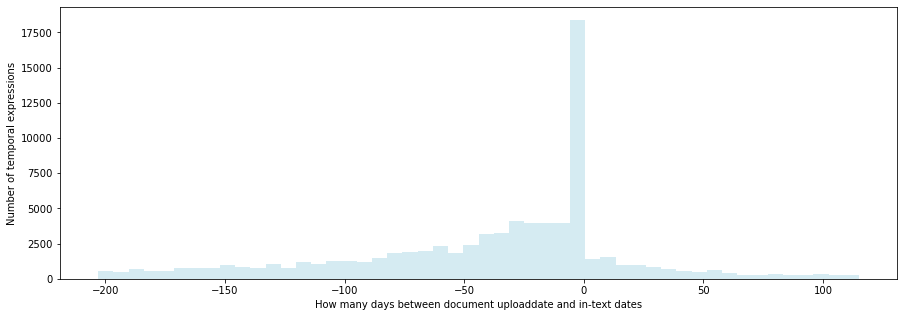

done


In [30]:
#Now, plot

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib.dates import date2num

s = 2008
e = 2024

#set universal bin width
start = datetime.date(s,1,1)
end = datetime.date(e,1,1)
d = 6*30

bin_width = datetime.timedelta(days=d)

#print((e - s) * 360)
#print((e - s) * 360 / d)

#print(len(range(0, int(e - (s * 360) / (d)))))
print(range(0, int((e - s) * 360 / d)))
#print(len(range(0, int((float(e)-s) / float(d)))))

week = []
for i in range(0, int((e - s) * 360 / d)):
    week.append(start + (i) * bin_width)

numweek = date2num(week)


def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

relativedates_int = [x.days for x in relativedates if x.days != 0]
relativedates_int = reject_outliers(np.array(relativedates_int))


print(min(relativedates_int))
print(max(relativedates_int))


print('now plotting')
#ig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [15, 5]
plt.hist(relativedates_int, bins=50, color='lightblue', alpha=0.5)
plt.xlabel('How many days between document uploaddate and in-text dates')
plt.ylabel('Number of temporal expressions')
#plt.hist(sum(memodates, []), bins=numweek, color='red', alpha=0.2)
#plt.hist(sum(historiedates, []), bins=numweek, color='yellow', alpha=0.5)
plt.show()
print('done')

In [ ]:
* Compute approach2
* Evaluate approach1
    * Take besluithistories
    * Find their dossiers
    * Compare besluithistorie contents (manual annots) to dossiers
        * recall (how many annotted did we find)
        * additions (how many non-annotted did wee find)
    * Test correctness
        * Consider all dossiers over size 10
        * Note how many are not correct
        
        
        
* Evaluate approach2
    * Take besluithistories
    * Find /all/ agendapoints with a (near)dupe of those besluithistories
    * Find all references in all attached documents
    * Compare all referenecs to besluithistorie contents
        * recall
        * additions
    * Correctness - are the references we find indeed relevant references
        URL for sure
        dates - unknown
        titles - unknown
        we probably need to test this somehow
            the testset might be small enough  to check exhaustively
            
            
* extract urls from all docs

In [ ]:
Goals this week
* Manual annotations
    Add council decisions
    Add references to /what type/
* Evaluation
    Correctness
    Completeness



* Update paper full parsed results
* Conceptually, What can we get from temporal expressions?
    * show how diffferent
    -> how genres are related?
    -> 
* What doctypes refer to what doctypes

* Should we compare domain-specific timelines (council proposals) vs generic timelines

* do the volumes or references by type change over time

In [28]:
print(memodates)

[]


25
now plotting


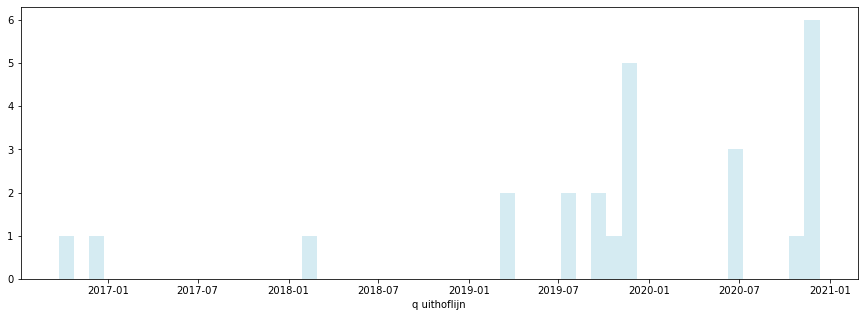

now plotting


ValueError: The 'color' keyword argument must have one color per dataset, but 49 datasets and 1 colors were provided

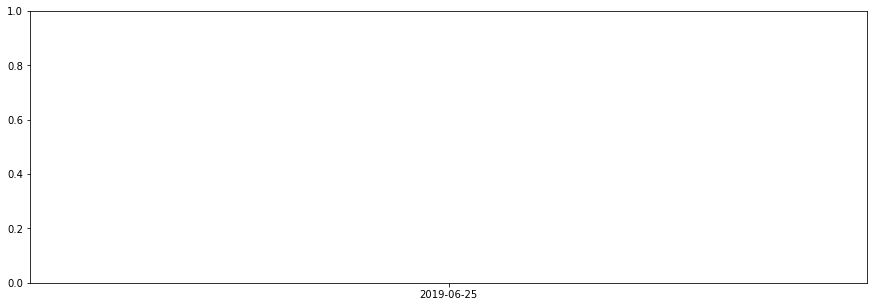

In [50]:
def getDate3(did):
    d = ''
    if did in entriesInformation:
        d = entriesInformation[d]
    elif did in documentsInformation:
        d = documentsInformation[did]
    elif did in listdocumentsInformation:
        d = listdocumentsInformation[did]
    else:
        print(did)
        error
    
    
    
    if d['origin type'] == 'entry':
        if 'Ontvangstdatum' in entriesInformation[d['origin id']]:
            curdate = entriesInformation[d['origin id']]['Ontvangstdatum']
        elif 'Datum' in entriesInformation[d['origin id']]:
            curdate = entriesInformation[d['origin id']]['Datum']
        elif 'Datum invoer' in entriesInformation[d['origin id']]:
            curdate = entriesInformation[d['origin id']]['Datum invoer']
        else:
            print(entriesInformation[d[0]['origin id']])
            anchor
    else: #case item document
        curdate = meetingsInformation[itemsInformation[documentsInformation[d['document id']]['origin id']]['origin id']]['meetingdate'] #date of id
    if curdate == None:
        return None
#        print(entriesInformation[d['origin id']])
    return parser.parse(curdate)

uithofnames = []
uithofids = []
uithoftypes = []

uithofdates = []

for i, d in enumerate(displaynames):
    if 'samen stad maken' in d.lower():
        uithofnames.append(displaynames[i])
        uithofids.append(displayids[i])
        uithoftypes.append(displaytypes[i])
        
        uithofdates.append(getDate3(displayids[i]))
        
        if 'historie' in d.lower():
            print(d)
            print(displayids[i])
        
print(len(uithofnames))

print('now plotting')
#ig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [15, 5]
plt.hist(uithofdates, bins=50, color='lightblue', alpha=0.5)
plt.xlabel('q uithoflijn')
plt.show()

#extract dates from besluithistorie
historyid = '009fd1d9-dc31-4086-8132-18c568b0db61'#'f1933aa3-b72f-4879-be41-48cea4899869'


#with open(extracts_dir + historyid) as json_file:
#    h = json.load(json_file)
    #uploaddate = norm(meetingsInformation[itemsInformation[documentsInformation[historyid]['origin id']]['origin id']]['meetingdate'])
    #for d in h[historyid]['dates']:

    
data['histories'][historyid]
        
print('now plotting')
#ig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [15, 5]
plt.hist(h[historyid]['dates'], bins=50, color='lightblue', alpha=0.5)
plt.xlabel('besluithistorie uithoflijn')
plt.show()


    

In [59]:
def printgenre(genre):
    titles = 0
    dates = 0
    ids = 0

    for h in genre:
        dates += len(genre[h]['date_list'])
        dates += len(genre[h]['date_meeting'])
        titles += len(genre[h]['title_list'])
        titles += len(genre[h]['title_meeting'])
        ids += len(genre[h]['url'])
        
    print('By ID')
    print(ids)
    print('By Date')
    print(dates)
    print('By Title')
    print(titles)

print('histories')
printgenre(data['histories'])
print()
print('letters')
printgenre(data['brieven'])
print()
print('memos')
printgenre(data['memos'])



histories
By ID
39
By Date
46
By Title
46

letters
By ID
14
By Date
13
By Title
4

memos
By ID
9
By Date
10
By Title
3
